<a href="https://colab.research.google.com/github/Nnalue-Emeka/Python_Projects/blob/main/Applying_supervised_learning_to_predict_student_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.3 Mini-project: Applying supervised learning to predict student dropout

## Business context
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment.

Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.

Study Group has provided you with 3 data sets.


## Objective
By the end of this mini-project, you will have developed the skills and knowledge to apply advanced machine learning techniques to create a predictive model for student dropout. This project will involve comprehensive data exploration, preprocessing, and feature engineering to ensure high-quality input for the models. You will employ and compare multiple predictive algorithms, such as XGBoost, and a neural network-based model, to determine the most effective model for predicting student dropout.

In the Notebook, you will:
- explore the data sets, taking a phased approach
- preprocess the data and conduct feature engineering
- predict the dropout rate using XGBoost, and a neural network-based model.

You will also write a report summarising the results of your findings and recommendations.

# Stage 1 data

In [ ]:
# File URL
file_url = "https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6"

In [ ]:
# importing the gdown
import gdown

# File ID from Google Drive link
file_id = "1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
gdown.download(url, "stage1.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6
To: /content/stage1.csv
100%|██████████| 6.06M/6.06M [00:00<00:00, 30.5MB/s]


'stage1.csv'

**Stage 1: Pre-processing instructions**
- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with > 50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.

In [ ]:
#Libraries for data cleaning, preprocessing and analysis
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder
from pandas import get_dummies
import io
from datetime import datetime
# Libraries for data visulisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# loading the dataset
stage1_df = pd.read_csv("stage1.csv")
print(stage1_df.shape)
stage1_df.head()

(25059, 16)


CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity  
0  University of Aberdeen  
1  University of Aberdeen  
2  University of Aberdeen  
3  University of Aberdeen  
4  University of Aberdeen

In [ ]:
# Data description and exploration
stage1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CentreName             25059 non-null  object
 1   LearnerCode            25059 non-null  int64 
 2   BookingType            25059 non-null  object
 3   LeadSource             25059 non-null  object
 4   DiscountType           7595 non-null   object
 5   DateofBirth            25059 non-null  object
 6   Gender                 25059 non-null  object
 7   Nationality            25059 non-null  object
 8   HomeState              8925 non-null   object
 9   HomeCity               21611 non-null  object
 10  CourseLevel            25059 non-null  object
 11  CourseName             25059 non-null  object
 12  IsFirstIntake          25059 non-null  bool  
 13  CompletedCourse        25059 non-null  object
 14  ProgressionDegree      24184 non-null  object
 15  ProgressionUniversi

**Data Cleaning**

In [ ]:
# Split the column by the first space
stage1_df[['ProgressionDegreeLevel', 'Other']] = stage1_df['ProgressionDegree'].str.split(' ', n=1, expand=True)

print(stage1_df)

         CentreName  LearnerCode BookingType              LeadSource  \
0      ISC_Aberdeen      2284932       Agent  Standard Agent Booking   
1      ISC_Aberdeen      2399500       Agent  Standard Agent Booking   
2      ISC_Aberdeen      2424946       Agent  Standard Agent Booking   
3      ISC_Aberdeen      2426583       Agent  Standard Agent Booking   
4      ISC_Aberdeen      2434674       Agent  Standard Agent Booking   
...             ...          ...         ...                     ...   
25054  ISC_Teesside      2786310       Agent  Standard Agent Booking   
25055  ISC_Teesside      2786483       Agent  Standard Agent Booking   
25056  ISC_Teesside      2786493       Agent  Standard Agent Booking   
25057  ISC_Teesside      2789063       Agent  Standard Agent Booking   
25058  ISC_Teesside      2800476       Agent  Standard Agent Booking   

                         DiscountType DateofBirth  Gender Nationality  \
0                                 NaN  13/01/1998    Male     

In [ ]:
stage1_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity ProgressionDegreeLevel  \
0  University of Aberdeen                    Msc   
1  University of Aberdeen                    BSc   
2  University of Aberdeen                     MA   
3  University of Aberdeen                     MA   
4  University of Aberdeen                    MSc   

                                       Other  
0  Econ Accounting and Investment Management  
1                        Biological Sciences  
2                                    Finance  
3                        Business Management  
4          International Business Management

In [ ]:
# Grouping of variables
# Define the mapping dictionary
mapping1 = {
    'null': 'None',
    'Msc': 'Master', 'MA': 'Master', 'MBChB': 'Master', 'Degree': 'Master', 'MScEcon': 'Master',
    'MBA': 'Master', 'MPharm': 'Master', 'MBBCh': 'Master', 'MPharma': 'Master', 'MBiomed': 'Master',
    'MMath': 'Master', 'Mathematics': 'Master', 'MEng': 'Master', 'MDS': 'Master', 'MSci': 'Master',
    'Mpham': 'Master', 'Mechanical': 'Master', 'MChem': 'Master', 'MLaw': 'Master', 'Business': 'Master',
    'Marketing': 'Master', 'MPhys': 'Master', 'MEng;': 'Master', 'MSci;': 'Master', 'MBiol': 'Master',
    'MChD': 'Master', 'Medicine': 'Master', 'MPsyc': 'Master', 'International': 'Master', 'Global': 'Master',
    'Professional': 'Master', 'MScÃ‚Â ': 'Master', 'Human': 'Master', 'Pre-Masters': 'Master', 'MComp': 'Master',
    'Mplan': 'Master', 'MPH': 'Master', 'Masters': 'Master', 'MBiolSci': 'Master', 'MSc(Res)': 'Master',
    'Data': 'Master', 'MLitt': 'Master', 'MArch': 'Master', 'Accounting': 'Master', 'Strategic': 'Master',
    'Electronic': 'Master', 'Management': 'Master', 'Electrical': 'Master', 'Entrepreneurship': 'Master',
    'Digital': 'Master', 'Finance': 'Master', 'Automotive': 'Master', 'MRes': 'Master',

    'BSc': 'Bachelor', 'BEng': 'Bachelor', 'LLM': 'Bachelor', 'LLB': 'Bachelor', 'Dietetics': 'Bachelor',
    'BSc/MArch': 'Bachelor', 'BA': 'Bachelor', 'BDS': 'Bachelor', 'BMus': 'Bachelor', 'BScEcon': 'Bachelor',
    'Medical': 'Bachelor', 'Foundation': 'Bachelor', 'Electrical': 'Bachelor', 'Biomedicine': 'Bachelor',
    '(BEng)': 'Bachelor', 'Pharmacy': 'Bachelor', 'Law': 'Bachelor', '(BSc)': 'Bachelor', 'BComm': 'Bachelor',
    'BE': 'Bachelor', 'BCL': 'Bachelor', 'BBL': 'Bachelor', 'Medicine': 'Bachelor', 'BSocSc': 'Bachelor',
    'BAFS': 'Bachelor', 'Engineering': 'Bachelor', '(BComm)': 'Bachelor', 'Eco/Fin': 'Bachelor',
    'BArchSc': 'Bachelor', 'BArch': 'Bachelor', 'Global': 'Bachelor', 'Contemporary': 'Bachelor',
    'International': 'Bachelor', 'BBA': 'Bachelor', 'Beng/Meng': 'Bachelor', 'BA(Hons)': 'Bachelor',
    'BEng(Hons)': 'Bachelor', 'BSC(Hons)': 'Bachelor', 'Podiatry': 'Bachelor', 'Computing': 'Bachelor',
    'BSC(Hons)Psychology': 'Bachelor', 'BSC(Hons)Software': 'Bachelor', 'Education': 'Bachelor',
    'Business': 'Bachelor', 'BSc(H)': 'Bachelor', 'BEng/BEng(Hons)': 'Bachelor', 'A': 'Bachelor',
    'Cyber': 'Bachelor', 'Pharmacology': 'Bachelor', 'Journalism': 'Bachelor', 'Civil': 'Bachelor',
    'Fashion': 'Bachelor', 'Psychology': 'Bachelor', 'Computer': 'Bachelor', 'Accounting': 'Bachelor',
    'Biomedical': 'Bachelor', 'Aerospace': 'Bachelor', 'Forensic': 'Bachelor', 'Mechatronics': 'Bachelor',
    'LBB': 'Bachelor', 'Biochemistry': 'Bachelor', 'Pharmaceutical': 'Bachelor', 'BSc/MSci': 'Bachelor',
    'Q100': 'Bachelor', 'BA/BSc': 'Bachelor', 'Criminology': 'Bachelor', 'Media': 'Bachelor',
    'Film;': 'Bachelor', 'Marketing': 'Bachelor', 'Film': 'Bachelor', 'Fine': 'Bachelor',
    'Sociology(': 'Bachelor', 'French': 'Bachelor', 'Mathematics;': 'Bachelor', 'Human': 'Bachelor',
    'Advertising': 'Bachelor', 'Management': 'Bachelor', 'History': 'Bachelor', 'Finance': 'Bachelor',
    'Mechanical': 'Bachelor', 'English': 'Bachelor', 'software': 'Bachelor', 'Politics': 'Bachelor',
    'Sociology': 'Bachelor', 'Geography': 'Bachelor', 'Economic': 'Bachelor', 'Languages': 'Bachelor',
    'Economics?Industry?': 'Bachelor', 'Economics;': 'Bachelor', 'media&cultural': 'Bachelor',
    'Psychology:': 'Bachelor', 'Philosophy;': 'Bachelor', 'NN25': 'Bachelor', 'Architectural': 'Bachelor',
    'Financial': 'Bachelor', 'Not': 'Bachelor', 'BSc(Econ)': 'Bachelor', 'BMedSci': 'Bachelor',
    'Bachelor': 'Bachelor', 'Humanities;': 'Bachelor', 'Chemical': 'Bachelor', 'Architecture': 'Bachelor',
    'Food': 'Bachelor', 'Nutrition': 'Bachelor', 'Automotive': 'Bachelor', 'Economics': 'Bachelor',
    'BVMSci': 'Bachelor', 'Electronic': 'Bachelor', 'Sport': 'Bachelor', 'Physics': 'Bachelor',
    'Biological': 'Bachelor', 'Veterinary': 'Bachelor', 'BM': 'Bachelor'
}

# Use map() for replacement
stage1_df['ProgressionDegreeLevel'] = stage1_df['ProgressionDegreeLevel'].map(mapping1).fillna(stage1_df['ProgressionDegreeLevel'])

# Display the updated DataFrame
stage1_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity ProgressionDegreeLevel  \
0  University of Aberdeen                 Master   
1  University of Aberdeen               Bachelor   
2  University of Aberdeen                 Master   
3  University of Aberdeen                 Master   
4  University of Aberdeen                    MSc   

                                       Other  
0  Econ Accounting and Investment Management  
1                        Biological Sciences  
2                                    Finance  
3                        Business Management  
4          International Business Management

In [ ]:
# Get unique values
unique_degrees = stage1_df['ProgressionDegreeLevel'].unique()
print(unique_degrees)

['Master' 'Bachelor' 'MSc' 'MSC' nan 'BSC' 'Bsc' 'Beng' 'Bcomm' 'BENG'
 'BEng/MEng' 'BSc(Hons)' 'Mpharm' 'BSc/Msci' 'LAW' 'media' 'Meng;' 'Meng'
 'MScÂ\xa0' 'Ma' 'MPlan' 'management' 'BENg']


In [ ]:
# Define a mapping dictionary
mapping2 = { 'MSc': 'Master','MSC': 'Master','BSC': 'Bachelor','Bsc': 'Bachelor','Beng': 'Bachelor',
           'Bcomm': 'Bachelor','BENG': 'Bachelor','BEng/MEng': 'Bachelor','BSc(Hons)': 'Bachelor',
            'Mpharm': 'Master','BSc/Msci': 'Master', 'LAW': 'Bachelor', 'media': 'Bachelor',
            'Meng;': 'Master', 'Meng' : 'Master', 'MScÂ\xa0' : 'Master',
            'Ma' : 'Master', 'MPlan' : 'Master', 'management': 'Bachelor', 'BENg': 'Bachelor'}

# Use map() for replacement
stage1_df['ProgressionDegreeLevel'] = stage1_df['ProgressionDegreeLevel'].map(mapping2).fillna(stage1_df['ProgressionDegreeLevel'])
stage1_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity ProgressionDegreeLevel  \
0  University of Aberdeen                 Master   
1  University of Aberdeen               Bachelor   
2  University of Aberdeen                 Master   
3  University of Aberdeen                 Master   
4  University of Aberdeen                 Master   

                                       Other  
0  Econ Accounting and Investment Management  
1                        Biological Sciences  
2                                    Finance  
3                        Business Management  
4          International Business Management

In [ ]:
# Replace NaN with None
stage1_df['ProgressionDegreeLevel'] = stage1_df['ProgressionDegreeLevel'].replace(
    {np.nan: 'Unknown'}
)

stage1_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity ProgressionDegreeLevel  \
0  University of Aberdeen                 Master   
1  University of Aberdeen               Bachelor   
2  University of Aberdeen                 Master   
3  University of Aberdeen                 Master   
4  University of Aberdeen                 Master   

                                       Other  
0  Econ Accounting and Investment Management  
1                        Biological Sciences  
2                                    Finance  
3                        Business Management  
4          International Business Management

In [ ]:
# Grouping of variables
# Define a mapping dictionary
mapping3 = {"Humanities; Law and Social Science Undergraduate Foundation Programme": "Arts, Humanities, and Social Sciences",
           "Arts; Humanities; Law and Social Sciences International Foundation Year": "Arts, Humanities, and Social Sciences",
           "Arts; Humanities; Law and Social Sciences - International Foundation Year": "Arts, Humanities, and Social Sciences",
           "Social Sciences; Arts and Humanities Foundation Year": "Arts, Humanities, and Social Sciences",
           "Humanities; Law and Social Science International Foundation Year": "Arts, Humanities, and Social Sciences",
           "Law and Social Science Pre-Masters": "Arts, Humanities, and Social Sciences",
           "International Foundation Year (Social Sciences)": "Arts, Humanities, and Social Sciences",
           "International Foundation Year - Law and Social Sciences": "Arts, Humanities, and Social Sciences",
           "Social Studies Foundation Year": "Arts, Humanities, and Social Sciences",
           "Mathematics and Statistics Foundation Year": "Arts, Humanities, and Social Sciences",
           "International Year One International Relations": "Arts, Humanities, and Social Sciences",
           "International Foundation Year (Arts and Social Sciences)": "Arts, Humanities, and Social Sciences",
           "International Foundation Year - Social Science; Arts and Humanities": "Arts, Humanities, and Social Sciences",
           "International Year One - International Relations and International Development": "Arts, Humanities, and Social Sciences",
           "Business and Law Pre-Masters": "Business, Economics, and Management",
           "Business Management and Finance International Year Two": "Business, Economics, and Management",
           "Business; Economics; Accounting and Real Estate Undergraduate Foundation Programme": "Business, Economics, and Management",
           "Business and Law Pre-Masters (ICAS)": "Business, Economics, and Management",
           "Business Management and Finance International Year Two (ICAS)": "Business, Economics, and Management",
           "Business; Economics; Accounting and Finance International Foundation Year": "Business, Economics, and Management",
           "Business; Social Sciences and Humanities Pre-Masters": "Business, Economics, and Management",
           "Accelerated International Foundation Year - Business; Economics; Accounting and Finance": "Business, Economics, and Management",
           "Business; Economics; Accounting and Finance - International Foundation Year": "Business, Economics, and Management",
           "Business; Social Sciences and Humanities Pre-Masters (2.5 Semesters)": "Business, Economics, and Management",
           "International Year One - Accounting and Finance": "Business, Economics, and Management",
           "Business; Economics and Social Sciences Foundation Year": "Business, Economics, and Management",
           "Business; Economics and Finance Foundation Year": "Business, Economics, and Management",
           "Business; Economics and Finance Foundation Year (Sponsored)": "Business, Economics, and Management",
           "Business; Economics; Accounting and Finance Pre-Masters": "Business, Economics, and Management",
           "Business and Management Foundation Year (taught at the Holland ISC; in Amsterdam)": "Business, Economics, and Management",
           "International Year One Business; Management and Marketing (ICAS)": "Business, Economics, and Management",
           "Pre-Masters Business; Management and Marketing (ICAS)": "Business, Economics, and Management",
           "International Foundation Year Business; Management and Law": "Business, Economics, and Management",
           "International Foundation Year Business; Management and Law (November Intake)": "Business, Economics, and Management",
           "International Year One Business; Management and Marketing": "Business, Economics, and Management",
           "Pre-Masters Business; Management and Marketing": "Business, Economics, and Management",
           "International Year One Business and Management - ICAS": "Business, Economics, and Management",
           "Business and Management Pre-Masters - ICAS": "Business, Economics, and Management",
           "International Foundation Year - International Business; Economics; Accounting and Finance": "Business, Economics, and Management",
           "Business and Management Pre-Masters (January intake)": "Business, Economics, and Management",
           "International Year One Marketing and Advertising - ICAS": "Business, Economics, and Management",
           "International Year One - Marketing and Advertising": "Business, Economics, and Management",
           "Business and Management Pre-Masters": "Business, Economics, and Management",
           "International Year One Accounting and Finance - ICAS": "Business, Economics, and Management",
           "International Year One - Business Management": "Business, Economics, and Management",
           "Business; Law and Social Studies International Foundation Year": "Business, Economics, and Management",
           "International Year One - Business": "Business, Economics, and Management",
           "Extended International Foundation Year: Business; Law and Social Studies": "Business, Economics, and Management",
           "Extended International Year One: Business": "Business, Economics, and Management",
           "Business; Management & Law Pre Masters - iCAS": "Business, Economics, and Management",
           "International Year One Business - ICAS": "Business, Economics, and Management",
           "International Year One Business (November Intake)": "Business, Economics, and Management",
           "Business; Law and Social Studies International Foundation Year (November Intake)": "Business, Economics, and Management",
           "Business; Law and Social Sciences Pre-Masters": "Business, Economics, and Management",
           "Business and Management Studies Foundation Year": "Business, Economics, and Management",
           "International Year One Business Management": "Business, Economics, and Management",
           "International Year One Business Management (November Intake)": "Business, Economics, and Management",
           "International Year One Business Management with Marketing": "Business, Economics, and Management",
           "International Year One Business and Management": "Business, Economics, and Management",
           "Business and Media Foundation Year": "Business, Economics, and Management",
           "International Year One Business and Management (3.5 Terms)": "Business, Economics, and Management",
           "Business; Management; Accounting and Finance Foundation Year": "Business, Economics, and Management",
           "International Year One Business; Management; Accounting and Finance": "Business, Economics, and Management",
           "Business; Management; Accounting and Finance Pre Masters": "Business, Economics, and Management",
           "Business; Management; Accounting and Finance International Foundation Year": "Business, Economics, and Management",
           "Business; Management; Accounting and Finance International Year One": "Business, Economics, and Management",
           "Business; Management; Accounting and Finance Pre-Masters": "Business, Economics, and Management",
           "Online Pre-Masters Programme: Business Management": "Business, Economics, and Management",
           "Online Accelerated Pre-Masters Programme: Business Management": "Business, Economics, and Management",
           "International Foundation Year (Management and Economics)": "Business, Economics, and Management",
           "International Year One (Business and Management)": "Business, Economics, and Management",
           "Pre-Masters Programme (Business and Management) - ICAS": "Business, Economics, and Management",
           "International Year One (Business and Management) - ICAS": "Business, Economics, and Management",
           "International Year One (Economics) - ICAS": "Business, Economics, and Management",
           "Online Accelerated Pre-Masters Programme": "Business, Economics, and Management",
           "Pre-Masters Programme (Economics) - ICAS": "Business, Economics, and Management",
           "International Foundation Year - Management and Economics": "Business, Economics, and Management",
           "Business; Social Sciences and Humanities Foundation Year": "Business, Economics, and Management",
           "Pre-Masters Business; Social Sciences and Humanities": "Business, Economics, and Management",
           "International Foundation Year Business; Social Sciences and Humanities": "Business, Economics, and Management",
           "Pre-Masters Business; Social Sciences and Humanities (1.5 Semesters)": "Business, Economics, and Management",
           "International Foundation Year Business; Social Sciences and Humanities (1.5 Semesters)": "Business, Economics, and Management",
           "Business and Social Sciences Pre-Masters": "Business, Economics, and Management",
           "Business and Social Sciences Undergraduate Foundation Programme": "Business, Economics, and Management",
           "International Year One BBA": "Business, Economics, and Management",
           "Accelerated Pre-Masters": "Business, Economics, and Management",
           "Management; Finance; Hospitality and Tourism Pre-Masters": "Business, Economics, and Management",
           "Business; Economics; Law and Social Sciences International Foundation Year": "Business, Economics, and Management",
           "Management; Finance; Hospitality and Tourism Pre-Masters (2.5 Semesters)": "Business, Economics, and Management",
           "International Year One - Business and Management": "Business, Economics, and Management",
           "International Foundation Year Business; Media and Social Sciences": "Business, Economics, and Management",
           "International Year One - Finance and Accounting": "Business, Economics, and Management",
           "Pre Masters Business; Media and Social Sciences": "Business, Economics, and Management",
           "International Foundation Year Business; Humanities Social Sciences and Law": "Business, Economics, and Management",
           "International Year One: Business (ICAS)": "Business, Economics, and Management",
           "International Year One: Business (ICAS) (February Intake)": "Business, Economics, and Management",
           "International Foundation Year Business; Humanities Social Sciences and Law (ICAS) (2.5 Terms)": "Business, Economics, and Management",
           "Accelerated Pre-Masters Programme Business; Humanities; Social Sciences and Law (ICAS)": "Business, Economics, and Management",
           "CertHE International Foundation and Year One with Business (ICAS)": "Business, Economics, and Management",
           "International Foundation Year Art; Media and Architecture": "Communication, Media, and Design",
           "International Foundation Year Art; Media and Architecture (November Intake)": "Communication, Media, and Design",
           "International Year One Media Studies (3.5 Terms)": "Communication, Media, and Design",
           "International Year One Media Studies": "Communication, Media, and Design",
           "International Year One - Film and Media": "Communication, Media, and Design",
           "Life Sciences Undergraduate Foundation Programme": "Health, Medicine, and Life Sciences",
           "Life Sciences - pathway to Medicine Undergraduate Foundation Programme": "Health, Medicine, and Life Sciences",
           "Health; Medical and Life Sciences International Foundation Year": "Health, Medicine, and Life Sciences",
           "Health Medical and Life Sciences - International Foundation Year": "Health, Medicine, and Life Sciences",
           "International Foundation Year Health and Human Science": "Health, Medicine, and Life Sciences",
           "International Foundation Year Health and Human Science (November Intake)": "Health, Medicine, and Life Sciences",
           "International Foundation Year Health and Human Science (April Intake)": "Health, Medicine, and Life Sciences",
           "Life Sciences Foundation Year": "Health, Medicine, and Life Sciences",
           "International Year One Biological Sciences": "Health, Medicine, and Life Sciences",
           "International Foundation Year - Sciences - Life Sciences and the Environment": "Health, Medicine, and Life Sciences",
           "International Foundation Year Dentistry": "Health, Medicine, and Life Sciences",
           "Health and Medical Sciences Pre-Masters": "Health, Medicine, and Life Sciences",
           "Life Sciences International Foundation  Year": "Health, Medicine, and Life Sciences",
           "International Year One - Law": "Law and Governance",
           "Law Foundation Year": "Law and Governance",
           "Physical Sciences and Engineering Undergraduate Foundation Programme": "Science, Engineering, and Technology",
           "Science and Engineering Pre-Masters": "Science, Engineering, and Technology",
           "Computing Science International Year Two (ICAS)": "Science, Engineering, and Technology",
           "Science and Engineering Pre-Masters (ICAS)": "Science, Engineering, and Technology",
           "Engineering; Physical Sciences and Architecture International Foundation Year": "Science, Engineering, and Technology",
           "Engineering; Physical Sciences and Architecture - International Foundation Year": "Science, Engineering, and Technology",
           "International Year One - Engineering": "Science, Engineering, and Technology",
           "Accelerated International Foundation Year - Engineering; Physical Science and Computer Science": "Science, Engineering, and Technology",
           "Engineering and Sciences Foundation Year": "Science, Engineering, and Technology",
           "Engineering and Sciences Foundation Year (Sponsored)": "Science, Engineering, and Technology",
           "Science and Engineering International Foundation Year": "Science, Engineering, and Technology",
           "Science; Engineering and Computing Foundation Year": "Science, Engineering, and Technology",
           "Science and Engineering Foundation Year (taught at the Holland ISC; in Amsterdam)": "Science, Engineering, and Technology",
           "International Year One Engineering and Computer Science (ICAS)": "Science, Engineering, and Technology",
           "International Foundation Year Engineering; Computing and Science": "Science, Engineering, and Technology",
           "International Year One Engineering and Computer Science": "Science, Engineering, and Technology",
           "International Foundation Year Engineering; Computing and Science (November Intake)": "Science, Engineering, and Technology",
           "International Foundation Year - Science; Technology; Engineering and Mathematics": "Science, Engineering, and Technology",
           "Extended International Foundation Year: Engineering; Computing and Life Sciences": "Science, Engineering, and Technology",
           "Engineering; Computing and Life Sciences International Foundation Year": "Science, Engineering, and Technology",
           "Engineering & Computing Pre Masters - iCAS": "Science, Engineering, and Technology",
           "International Year One Engineering - ICAS": "Science, Engineering, and Technology",
           "Engineering; Computing and Life Sciences International Foundation Year (November Intake)": "Science, Engineering, and Technology",
           "Engineering; Computing; Mathematics and Science Pre-Masters": "Science, Engineering, and Technology",
           "Engineering and Computing Foundation Year": "Science, Engineering, and Technology",
           "Science; Engineering and Computing International Foundation Year": "Science, Engineering, and Technology",
           "International Year One Computer Science (3.5 Terms)": "Science, Engineering, and Technology",
           "International Year One Engineering": "Science, Engineering, and Technology",
           "International Year One Computer Science": "Science, Engineering, and Technology",
           "International Year One Engineering (3.5 Terms)": "Science, Engineering, and Technology",
           "International Foundation Year (Sciences)": "Science, Engineering, and Technology",
           "International Year One (Computer Science)": "Science, Engineering, and Technology",
           "International Year One (Computer Science) - ICAS": "Science, Engineering, and Technology",
           "International Year One (Electronic Engineering) - ICAS": "Science, Engineering, and Technology",
           "Pre-Masters Programme (Computer Science; Electronic Engineering and Information Security) - ICAS": "Science, Engineering, and Technology",
           "International Foundation Year - Sciences - Engineering; Physical and Mathematical": "Science, Engineering, and Technology",
           "Science and Engineering Foundation Year": "Science, Engineering, and Technology",
           "International Foundation Year Science and Engineering": "Science, Engineering, and Technology",
           "Pre-Masters Science and Engineering": "Science, Engineering, and Technology",
           "Pre-Masters Science and Engineering (1.5 Semesters)": "Science, Engineering, and Technology",
           "International Foundation Year Science and Engineering (1.5 Semesters)": "Science, Engineering, and Technology",
           "Engineering and Sciences Undergraduate Foundation Programme": "Science, Engineering, and Technology",
           "Engineering and Sciences Pre-Masters": "Science, Engineering, and Technology",
           "Computing; Engineering and Physical Sciences International Foundation Year": "Science, Engineering, and Technology",
           "Engineering Pre-Masters": "Science, Engineering, and Technology",
           "Engineering Pre-Masters (2.5 Semesters)": "Science, Engineering, and Technology",
           "International Year One - Computing": "Science, Engineering, and Technology",
           "Pre Masters Science and Engineering": "Science, Engineering, and Technology",
           "International Year One: Engineering and Computing (ICAS)": "Science, Engineering, and Technology",
           "International Foundation Year Computing; Engineering and Health Sciences": "Science, Engineering, and Technology",
           "International Year One: Engineering and Computing (ICAS) (February Intake)": "Science, Engineering, and Technology",
           "International Foundation Year Computing; Engineering and Health Sciences (ICAS) (2.5 Terms)": "Science, Engineering, and Technology",
           "Accelerated Pre-Masters Programme Computing; Engineering and Health Sciences (ICAS)": "Science, Engineering, and Technology"}

# Use map() for replacement
stage1_df['CourseFaculty'] = stage1_df['CourseName'].map(mapping3).fillna(stage1_df['CourseName'])
stage1_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity ProgressionDegreeLevel  \
0  University of Aberdeen                 Master   
1  University of Aberdeen               Bachelor   
2  University of Aberdeen                 Master   
3  University of Aberdeen                 Master   
4  University of Aberdeen                 Master   

                                       Other  \
0  Econ Accounting and Investment Management   
1                        Biological Sciences   
2                                    Finance   
3                        Business Management   
4          International Business Management   

                         CourseFaculty  
0  Business, Economics, and Management  
1  Health, Medicine, and Life Sciences  
2  Business, Economics, and Management  
3  Business, Economics, and Management  
4  Business, Economics, and Management

In [ ]:
# Convert 'DateOfBirth' column to datetime
stage1_df['DateofBirth'] = pd.to_datetime(stage1_df['DateofBirth'])

# Function to calculate age
def calculate_age(birthdate):
    today = datetime.today()
    age = today.year - birthdate.year
    # Adjust if the birthday hasn't occurred yet this year
    if (today.month, today.day) < (birthdate.month, birthdate.day):
        age -= 1
    return age

# Apply the function to the 'DateOfBirth' column
stage1_df['Age'] = stage1_df['DateofBirth'].apply(calculate_age)

stage1_df.head()

<ipython-input-13-30200d1499cf>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  stage1_df['DateofBirth'] = pd.to_datetime(stage1_df['DateofBirth'])


CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  1998-01-13   Male     Chinese  Jianye District; Jiangsu Province   
1  1998-02-12   Male     Chinese                                NaN   
2  2000-04-07   Male     Chinese                                NaN   
3  1999-05-18   Male     Chinese                                NaN   
4  1996-04-19   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity ProgressionDegreeLevel  \
0  University of Aberdeen                 Master   
1  University of Aberdeen               Bachelor   
2  University of Aberdeen                 Master   
3  University of Aberdeen                 Master   
4  University of Aberdeen                 Master   

                                       Other  \
0  Econ Accounting and Investment Management   
1                        Biological Sciences   
2                                    Finance   
3                        Business Management   
4          International Business Management   

                         CourseFaculty  Age  
0  Business, Economics, and Management   27  
1  Health, Medicine, and Life Sciences   27  
2  Business, Economics, and Management   24  
3  Business, Economics, and Management   25  
4  Business, Economics, and Management   28

In [ ]:
unique_age = stage1_df['Age'].unique()
print(unique_age)

[27 24 25 28 22 23 26 43 29 30 33 31 21 44 39 32 35 20 40 36 34 19 53 50
 47 38 41 45 42 51 48 37 46 49 55 62 57 54]


In [ ]:
# Define the bins
bins = [19, 29, 39, 49, 59, 69]

# Define the labels for the bins
labels = ['19-28', '29-38', '39-48', '49-58', '59-68']

# Group the 'Age' column into bins
stage1_df['AgeGroup'] = pd.cut(stage1_df['Age'], bins=bins, labels=labels, right=False)

stage1_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  1998-01-13   Male     Chinese  Jianye District; Jiangsu Province   
1  1998-02-12   Male     Chinese                                NaN   
2  2000-04-07   Male     Chinese                                NaN   
3  1999-05-18   Male     Chinese                                NaN   
4  1996-04-19   Male     Chinese                                NaN   

                 HomeCity  ...  \
0                 Nanjing  ...   
1                   Xi'an  ...   
2                 Chengdu  ...   
3  LIUYANG CITY ;CHANGSHA  ...   
4                  Xiamen  ...   

                                          CourseName IsFirstIntake  \
0                       Business and Law Pre-Masters          True   
1   Life Sciences Undergraduate Foundation Programme         False   
2  Business Management and Finance International ...         False   
3  Business Management and Finance International ...          True   
4                       Business and Law Pre-Masters          True   

   CompletedCourse                              ProgressionDegree  \
0              Yes  Msc Econ Accounting and Investment Management   
1              Yes                        BSc Biological Sciences   
2              Yes                                     MA Finance   
3              Yes                         MA Business Management   
4              Yes          MSc International Business Management   

    ProgressionUniversity ProgressionDegreeLevel  \
0  University of Aberdeen                 Master   
1  University of Aberdeen               Bachelor   
2  University of Aberdeen                 Master   
3  University of Aberdeen                 Master   
4  University of Aberdeen                 Master   

                                       Other  \
0  Econ Accounting and Investment Management   
1                        Biological Sciences   
2                                    Finance   
3                        Business Management   
4          International Business Management   

                         CourseFaculty Age  AgeGroup  
0  Business, Economics, and Management  27     19-28  
1  Health, Medicine, and Life Sciences  27     19-28  
2  Business, Economics, and Management  24     19-28  
3  Business, Economics, and Management  25     19-28  
4  Business, Economics, and Management  28     19-28  

[5 rows x 21 columns]

In [ ]:
nationality_to_continent = {
    'Kenyan': 'Africa',
    'Egyptian': 'Africa',
    'Nigerian': 'Africa',
    'Angolan': 'Africa',
    'Namibian': 'Africa',
    'Zimbabwean': 'Africa',
    'Ghanaian': 'Africa',
    'Senegalese': 'Africa',
    'Ugandan': 'Africa',
    'Mozambican': 'Africa',
    'Mauritanian': 'Africa',
    'South Sudanese': 'Africa',
    'Sudanese': 'Africa',
    'Tanzanian': 'Africa',
    'Gabonese': 'Africa',
    'Eritrean': 'Africa',
    'Botswanan': 'Africa',
    'Liberian': 'Africa',
    'Tunisian': 'Africa',
    'Ethiopian': 'Africa',
    'Rwandan': 'Africa',
    'Ivorian': 'Africa',
    'Mauritian': 'Africa',
    'Sierra Leonean': 'Africa',
    'Malawian': 'Africa',
    'Equatoguinean': 'Africa',
    'Malian': 'Africa',
    'Swazi': 'Africa',
    'Burundi': 'Africa',
    'Nigerien': 'Africa',
    'Maldivian': 'Africa',
    'Chinese': 'Asia',
    'Iraqi': 'Asia',
    'Kazakhstani': 'Asia',
    'Taiwanese': 'Asia',
    'Lebanese': 'Asia',
    'Kuwaiti': 'Asia',
    'Qatari': 'Asia',
    'Vietnamese': 'Asia',
    'Emirati': 'Asia',
    'Hong Kong Chinese': 'Asia',
    'Indian': 'Asia',
    'Myanmarian': 'Asia',
    'Singaporean': 'Asia',
    'Bahraini': 'Asia',
    'Japanese': 'Asia',
    'Bangladeshi': 'Asia',
    'Jordanian': 'Asia',
    'Saudi': 'Asia',
    'Pakistani': 'Asia',
    'Syrian': 'Asia',
    'Afghan': 'Asia',
    'Malaysian': 'Asia',
    'Thai': 'Asia',
    'Sri Lankan': 'Asia',
    'Korean': 'Asia',
    'Indonesian': 'Asia',
    'Iranian': 'Asia',
    'Nepalese': 'Asia',
    'Armenian': 'Asia',
    'Uzbek': 'Asia',
    'Philippine': 'Asia',
    'Macau Chinese': 'Asia',
    'Bruneian': 'Asia',
    'Cambodian': 'Asia',
    'Palestinian': 'Asia',
    'Tajikistani': 'Asia',
    'Kyrgyzstani': 'Asia',
    'Mongolian': 'Asia',
    'Laotian': 'Asia',
    'Yemeni': 'Asia',
    'Laotian': 'Asia',

    # Europe
    'British': 'Europe',
    'German': 'Europe',
    'Spanish': 'Europe',
    'Belgian': 'Europe',
    'Slovak': 'Europe',
    'Irish': 'Europe',
    'Albanian': 'Europe',
    'Ukrainian': 'Europe',
    'Italian': 'Europe',
    'Azerbaijani': 'Europe',
    'Belarusian': 'Europe',
    'Dutch': 'Europe',
    'Portuguese': 'Europe',
    'Norwegian': 'Europe',
    'Romanian': 'Europe',
    'French': 'Europe',
    'Swiss': 'Europe',
    'Icelandic': 'Europe',
    'Swedish': 'Europe',
    'Polish': 'Europe',
    'Latvian': 'Europe',
    'Czech': 'Europe',
    'Greek': 'Europe',
    'Cypriot': 'Europe',
    'Moldovan': 'Europe',
    'Hungarian': 'Europe',
    'Austrian': 'Europe',
    'Croatian': 'Europe',
    'Serbian': 'Europe',
    'Bosnian': 'Europe',
    'Danish': 'Europe',
    'Russian': 'Europe',

    # Americas
    'American': 'Americas',
    'Brazilian': 'Americas',
    'Mexican': 'Americas',
    'Peruvian': 'Americas',
    'Canadian': 'Americas',
    'Dominican Republic': 'Americas',
    'Bolivian': 'Americas',
    'Honduran': 'Americas',
    'Argentine': 'Americas',
    'Guatemalan': 'Americas',
    'Chilean': 'Americas',
    'Colombian': 'Americas',
    'Paraguayan': 'Americas',
    'Uruguayan': 'Americas',
    'Trinidadian': 'Americas',
    'Nicaraguan': 'Americas',
    'Jamaican': 'Americas',
    'Barbadian': 'Americas',
    'Antiguan': 'Americas',
    'Guyanese': 'Americas',
    'Bahamian': 'Americas',
    'Panamanian': 'Americas',
    'Dominica (Commonwealth)': 'Americas',
    # Oceania
    'Australian': 'Oceania',
    'New Zealand': 'Oceania',
    'Fijian': 'Oceania',

    # Other/Unknown
    '(Not known)': 'Unknown',

    # Africa
    'Libyan': 'Africa',
    'Omani': 'Asia',
    'Turkish': 'Europe',
    'Algerian': 'Africa',
    'Moroccan': 'Africa',
    'South African': 'Africa',
    'Cameroonian': 'Africa',
    'Zambian': 'Africa',
    'Seychelles': 'Africa',
    'Guinean': 'Africa',
    'Ecuadorian': 'Americas',
    'British National (Overseas)': 'Europe',
    'Georgian': 'Asia',
    'Kittitian': 'Americas',
    'Bermudian': 'Americas',
    'Maltese': 'Europe',
    'Bulgarian': 'Europe',
    'Turkmen': 'Asia',
    'Grenadian': 'Americas',
    'Israeli': 'Asia',
    'Venezuelan': 'Americas'
}

In [ ]:
# Map nationalities to continents
stage1_df['Continent'] = stage1_df['Nationality'].map(nationality_to_continent)

stage1_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  1998-01-13   Male     Chinese  Jianye District; Jiangsu Province   
1  1998-02-12   Male     Chinese                                NaN   
2  2000-04-07   Male     Chinese                                NaN   
3  1999-05-18   Male     Chinese                                NaN   
4  1996-04-19   Male     Chinese                                NaN   

                 HomeCity  ... IsFirstIntake CompletedCourse  \
0                 Nanjing  ...          True             Yes   
1                   Xi'an  ...         False             Yes   
2                 Chengdu  ...         False             Yes   
3  LIUYANG CITY ;CHANGSHA  ...          True             Yes   
4                  Xiamen  ...          True             Yes   

                               ProgressionDegree   ProgressionUniversity  \
0  Msc Econ Accounting and Investment Management  University of Aberdeen   
1                        BSc Biological Sciences  University of Aberdeen   
2                                     MA Finance  University of Aberdeen   
3                         MA Business Management  University of Aberdeen   
4          MSc International Business Management  University of Aberdeen   

  ProgressionDegreeLevel                                      Other  \
0                 Master  Econ Accounting and Investment Management   
1               Bachelor                        Biological Sciences   
2                 Master                                    Finance   
3                 Master                        Business Management   
4                 Master          International Business Management   

                         CourseFaculty Age AgeGroup  Continent  
0  Business, Economics, and Management  27    19-28       Asia  
1  Health, Medicine, and Life Sciences  27    19-28       Asia  
2  Business, Economics, and Management  24    19-28       Asia  
3  Business, Economics, and Management  25    19-28       Asia  
4  Business, Economics, and Management  28    19-28       Asia  

[5 rows x 22 columns]

In [ ]:
# Get unique values
unique_cont = stage1_df['Continent'].unique()
print(unique_cont)

['Asia' 'Africa' 'Europe' 'Americas' 'Unknown' 'Oceania']


In [ ]:
# Define the grouping dictionary
institution_type_dict = {
    # Traditional Universities
    'University of Aberdeen': 'Traditional University',
    'Cardiff University': 'Traditional University',
    'University College Dublin': 'Traditional University',
    'Durham University': 'Traditional University',
    'Strathclyde University': 'Traditional University',
    'Coventry University London': 'Traditional University',
    'University of Huddersfield': 'Traditional University',
    'Kingston University London': 'Traditional University',
    'Liverpool John Moores University': 'Traditional University',
    'Keele University': 'Traditional University',
    'Lancaster University': 'Traditional University',
    'Leeds Beckett University': 'Traditional University',
    'University of Leeds': 'Traditional University',
    'University of Lincoln': 'Traditional University',
    'Coventry University': 'Traditional University',
    'University of Strathclyde': 'Traditional University',
    'Royal Holloway': 'Traditional University',
    'University of Sheffield International College': 'Traditional University',
    'University of Surrey': 'Traditional University',
    'University of Sussex': 'Traditional University',
    'Teesside University': 'Traditional University',

    # Business Schools
    'HULT Business School': 'Business School',

    # Online/Pathway Programs
    'UK Online Pathways': 'Online/Pathway Program',

    # International Study Centers (ISC)
    'Holland ISC - Erasmus University Rotterdam': 'International Study Center (ISC)',
    'Holland ISC - VU Amsterdam': 'International Study Center (ISC)',
    'Holland ISC - Hanze UAS': 'International Study Center (ISC)',
    'Holland ISC - Erasmus University Rotterdam/ Tilburg University': 'International Study Center (ISC)',
    'Holland ISC - Tilburg University': 'International Study Center (ISC)',
    'Holland ISC - VU Amsterdam/ Military service': 'International Study Center (ISC)',
    'Holland ISC - Erasmus University Rotterdam/ Holland ISC - Tilburg University': 'International Study Center (ISC)',
    'Holland ISC - Erasmus University Rotterdam/Holland ISC - VU Amsterdam': 'International Study Center (ISC)',
    'Holland ISC - Tilburg University/VU Amsterdam/Hanze': 'International Study Center (ISC)',
    'Holland ISC - Erasmus University Rotterdam/Holland ISC - Tilburg University': 'International Study Center (ISC)',
    'Holland ISC - Erasmus University Rotterdam/Tilburg University': 'International Study Center (ISC)',
    'Holland ISC - Hanze UAS/VU Amsterdam': 'International Study Center (ISC)',
    'Tilburg University': 'International Study Center (ISC)',
    'VU Amsterdam': 'International Study Center (ISC)',
    'Erasmus Rotterdam': 'International Study Center (ISC)',
    'Hanze UAS': 'International Study Center (ISC)',

    # Other
    'Outside of partnership': 'Other'
}

In [ ]:
# Map the institution types to the DataFrame
stage1_df['ProgressionUniversityType'] = stage1_df['ProgressionUniversity'].map(institution_type_dict)
stage1_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  1998-01-13   Male     Chinese  Jianye District; Jiangsu Province   
1  1998-02-12   Male     Chinese                                NaN   
2  2000-04-07   Male     Chinese                                NaN   
3  1999-05-18   Male     Chinese                                NaN   
4  1996-04-19   Male     Chinese                                NaN   

                 HomeCity  ... CompletedCourse  \
0                 Nanjing  ...             Yes   
1                   Xi'an  ...             Yes   
2                 Chengdu  ...             Yes   
3  LIUYANG CITY ;CHANGSHA  ...             Yes   
4                  Xiamen  ...             Yes   

                               ProgressionDegree   ProgressionUniversity  \
0  Msc Econ Accounting and Investment Management  University of Aberdeen   
1                        BSc Biological Sciences  University of Aberdeen   
2                                     MA Finance  University of Aberdeen   
3                         MA Business Management  University of Aberdeen   
4          MSc International Business Management  University of Aberdeen   

  ProgressionDegreeLevel                                      Other  \
0                 Master  Econ Accounting and Investment Management   
1               Bachelor                        Biological Sciences   
2                 Master                                    Finance   
3                 Master                        Business Management   
4                 Master          International Business Management   

                         CourseFaculty Age AgeGroup Continent  \
0  Business, Economics, and Management  27    19-28      Asia   
1  Health, Medicine, and Life Sciences  27    19-28      Asia   
2  Business, Economics, and Management  24    19-28      Asia   
3  Business, Economics, and Management  25    19-28      Asia   
4  Business, Economics, and Management  28    19-28      Asia   

   ProgressionUniversityType  
0     Traditional University  
1     Traditional University  
2     Traditional University  
3     Traditional University  
4     Traditional University  

[5 rows x 23 columns]

In [ ]:
# Define the grouping dictionary
country_grouping_dict = {
    'ISC_Aberdeen': 'United Kingdom (UK)',
    'ISC_Cardiff': 'United Kingdom (UK)',
    'ISC_Dublin': 'Ireland',
    'ISC_Durham': 'United Kingdom (UK)',
    'ISC_Holland': 'Netherlands',
    'ISC_Huddersfield': 'United Kingdom (UK)',
    'ISC_Kingston': 'United Kingdom (UK)',
    'ISC_LJMU': 'United Kingdom (UK)',
    'ISC_Lancaster': 'United Kingdom (UK)',
    'ISC_Leeds': 'United Kingdom (UK)',
    'ISC_Lincoln': 'United Kingdom (UK)',
    'ISC_London': 'United Kingdom (UK)',
    'ISC_Online': 'Online',
    'ISC_RHUL': 'United Kingdom (UK)',
    'ISC_Sheffield': 'United Kingdom (UK)',
    'ISC_Strathclyde': 'United Kingdom (UK)',
    'ISC_Surrey': 'United Kingdom (UK)',
    'ISC_Sussex': 'United Kingdom (UK)',
    'ISC_Teesside': 'United Kingdom (UK)'
}

In [ ]:
# Map the ISCs to their countries
stage1_df['CentreNameByCountry'] = stage1_df['CentreName'].map(country_grouping_dict)

In [ ]:
stage1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CentreName                 25059 non-null  object        
 1   LearnerCode                25059 non-null  int64         
 2   BookingType                25059 non-null  object        
 3   LeadSource                 25059 non-null  object        
 4   DiscountType               7595 non-null   object        
 5   DateofBirth                25059 non-null  datetime64[ns]
 6   Gender                     25059 non-null  object        
 7   Nationality                25059 non-null  object        
 8   HomeState                  8925 non-null   object        
 9   HomeCity                   21611 non-null  object        
 10  CourseLevel                25059 non-null  object        
 11  CourseName                 25059 non-null  object        
 12  IsFi

In [ ]:
# Get the number of unique values for all columns
unique_counts = stage1_df.nunique()

print(unique_counts)

CentreName                      19
LearnerCode                  24877
BookingType                      2
LeadSource                       7
DiscountType                    11
DateofBirth                   4705
Gender                           2
Nationality                    151
HomeState                     2448
HomeCity                      5881
CourseLevel                      4
CourseName                     172
IsFirstIntake                    2
CompletedCourse                  2
ProgressionDegree             2616
ProgressionUniversity           40
ProgressionDegreeLevel           3
Other                         2261
CourseFaculty                    6
Age                             38
AgeGroup                         5
Continent                        6
ProgressionUniversityType        5
CentreNameByCountry              4
dtype: int64


In [ ]:
# LearnerCode, Age, DateofBirth and Other are some of the useless columns in the dataset
# DiscountType and HomeState are columns with more than 50% missing values
# Drop the those columns
stage1_dfclean = stage1_df.drop(['LearnerCode', 'Other', 'Age', 'DateofBirth', 'Nationality', 'CentreName',
                                 'DiscountType', 'HomeState', 'HomeCity', 'ProgressionDegree','CourseName', 'ProgressionUniversity'], axis=1)

stage1_dfclean.head()

BookingType              LeadSource Gender             CourseLevel  \
0       Agent  Standard Agent Booking   Male             Pre-Masters   
1       Agent  Standard Agent Booking   Male              Foundation   
2       Agent  Standard Agent Booking   Male  International Year Two   
3       Agent  Standard Agent Booking   Male  International Year Two   
4       Agent  Standard Agent Booking   Male             Pre-Masters   

   IsFirstIntake CompletedCourse ProgressionDegreeLevel  \
0           True             Yes                 Master   
1          False             Yes               Bachelor   
2          False             Yes                 Master   
3           True             Yes                 Master   
4           True             Yes                 Master   

                         CourseFaculty AgeGroup Continent  \
0  Business, Economics, and Management    19-28      Asia   
1  Health, Medicine, and Life Sciences    19-28      Asia   
2  Business, Economics, and Management    19-28      Asia   
3  Business, Economics, and Management    19-28      Asia   
4  Business, Economics, and Management    19-28      Asia   

  ProgressionUniversityType  CentreNameByCountry  
0    Traditional University  United Kingdom (UK)  
1    Traditional University  United Kingdom (UK)  
2    Traditional University  United Kingdom (UK)  
3    Traditional University  United Kingdom (UK)  
4    Traditional University  United Kingdom (UK)

In [ ]:
# Get the number of unique values for all columns
unique_counts = stage1_dfclean.nunique()

print(unique_counts)

BookingType                  2
LeadSource                   7
Gender                       2
CourseLevel                  4
IsFirstIntake                2
CompletedCourse              2
ProgressionDegreeLevel       3
CourseFaculty                6
AgeGroup                     5
Continent                    6
ProgressionUniversityType    5
CentreNameByCountry          4
dtype: int64


In [ ]:
# Ordinal encoding for Age Group
age_group_mapping = {
'19-28': 0, '29-38': 1, '39-48': 2, '49-58': 3, '59-68' :4
}
stage1_dfclean['AgeGroup_Encoded'] = stage1_dfclean['AgeGroup'].map(age_group_mapping)

In [ ]:
# Label encoding for CompletedCourse
stage1_dfclean['CompletedCourse_Encoded'] = stage1_dfclean['CompletedCourse'].map({'Yes': 1, 'No': 0})

In [ ]:
# Perform one-hot encoding
stage1_dfclean = pd.get_dummies(stage1_dfclean, columns=[
    'BookingType', 'LeadSource', 'CourseLevel', 'ProgressionDegreeLevel',
    'CourseFaculty', 'Continent', 'ProgressionUniversityType', 'CentreNameByCountry'
])

# Display the encoded DataFrame
stage1_dfclean.head()

Gender  IsFirstIntake CompletedCourse AgeGroup AgeGroup_Encoded  \
0   Male           True             Yes    19-28                0   
1   Male          False             Yes    19-28                0   
2   Male          False             Yes    19-28                0   
3   Male           True             Yes    19-28                0   
4   Male           True             Yes    19-28                0   

   CompletedCourse_Encoded  BookingType_Agent  BookingType_Direct  \
0                        1               True               False   
1                        1               True               False   
2                        1               True               False   
3                        1               True               False   
4                        1               True               False   

   LeadSource_APD  LeadSource_Digital (Web)  ...  Continent_Unknown  \
0           False                     False  ...              False   
1           False                     False  ...              False   
2           False                     False  ...              False   
3           False                     False  ...              False   
4           False                     False  ...              False   

   ProgressionUniversityType_Business School  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   ProgressionUniversityType_International Study Center (ISC)  \
0                                              False            
1                                              False            
2                                              False            
3                                              False            
4                                              False            

   ProgressionUniversityType_Online/Pathway Program  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   ProgressionUniversityType_Other  \
0                            False   
1                            False   
2                            False   
3                            False   
4                            False   

   ProgressionUniversityType_Traditional University  \
0                                              True   
1                                              True   
2                                              True   
3                                              True   
4                                              True   

   CentreNameByCountry_Ireland  CentreNameByCountry_Netherlands  \
0                        False                            False   
1                        False                            False   
2                        False                            False   
3                        False                            False   
4                        False                            False   

   CentreNameByCountry_Online  CentreNameByCountry_United Kingdom (UK)  
0                       False                                     True  
1                       False                                     True  
2                       False                                     True  
3                       False                                     True  
4                       False                                     True  

[5 rows x 43 columns]

In [ ]:
encoded_stage1_df = stage1_dfclean.drop(['AgeGroup', 'CompletedCourse', 'Gender'], axis=1)

print(encoded_stage1_df.shape)
encoded_stage1_df.head()

(25059, 40)


IsFirstIntake AgeGroup_Encoded  CompletedCourse_Encoded  BookingType_Agent  \
0           True                0                        1               True   
1          False                0                        1               True   
2          False                0                        1               True   
3           True                0                        1               True   
4           True                0                        1               True   

   BookingType_Direct  LeadSource_APD  LeadSource_Digital (Web)  \
0               False           False                     False   
1               False           False                     False   
2               False           False                     False   
3               False           False                     False   
4               False           False                     False   

   LeadSource_Re-enrolment  LeadSource_Referrals  LeadSource_Sponsor  ...  \
0                    False                 False               False  ...   
1                    False                 False               False  ...   
2                    False                 False               False  ...   
3                    False                 False               False  ...   
4                    False                 False               False  ...   

   Continent_Unknown  ProgressionUniversityType_Business School  \
0              False                                      False   
1              False                                      False   
2              False                                      False   
3              False                                      False   
4              False                                      False   

   ProgressionUniversityType_International Study Center (ISC)  \
0                                              False            
1                                              False            
2                                              False            
3                                              False            
4                                              False            

   ProgressionUniversityType_Online/Pathway Program  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   ProgressionUniversityType_Other  \
0                            False   
1                            False   
2                            False   
3                            False   
4                            False   

   ProgressionUniversityType_Traditional University  \
0                                              True   
1                                              True   
2                                              True   
3                                              True   
4                                              True   

   CentreNameByCountry_Ireland  CentreNameByCountry_Netherlands  \
0                        False                            False   
1                        False                            False   
2                        False                            False   
3                        False                            False   
4                        False                            False   

   CentreNameByCountry_Online  CentreNameByCountry_United Kingdom (UK)  
0                       False                                     True  
1                       False                                     True  
2                       False                                     True  
3                       False                                     True  
4                       False                                     True  

[5 rows x 40 columns]

In [ ]:
encoded_stage1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 40 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   IsFirstIntake                                               25059 non-null  bool    
 1   AgeGroup_Encoded                                            25059 non-null  category
 2   CompletedCourse_Encoded                                     25059 non-null  int64   
 3   BookingType_Agent                                           25059 non-null  bool    
 4   BookingType_Direct                                          25059 non-null  bool    
 5   LeadSource_APD                                              25059 non-null  bool    
 6   LeadSource_Digital (Web)                                    25059 non-null  bool    
 7   LeadSource_Re-enrolment                                     25059 non-null  

**Building Models**

In [ ]:
X = encoded_stage1_df.drop('CompletedCourse_Encoded', axis=1)  # Features
X.head()

IsFirstIntake AgeGroup_Encoded  BookingType_Agent  BookingType_Direct  \
0           True                0               True               False   
1          False                0               True               False   
2          False                0               True               False   
3           True                0               True               False   
4           True                0               True               False   

   LeadSource_APD  LeadSource_Digital (Web)  LeadSource_Re-enrolment  \
0           False                     False                    False   
1           False                     False                    False   
2           False                     False                    False   
3           False                     False                    False   
4           False                     False                    False   

   LeadSource_Referrals  LeadSource_Sponsor  \
0                 False               False   
1                 False               False   
2                 False               False   
3                 False               False   
4                 False               False   

   LeadSource_Standard Agent Booking  ...  Continent_Unknown  \
0                               True  ...              False   
1                               True  ...              False   
2                               True  ...              False   
3                               True  ...              False   
4                               True  ...              False   

   ProgressionUniversityType_Business School  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   ProgressionUniversityType_International Study Center (ISC)  \
0                                              False            
1                                              False            
2                                              False            
3                                              False            
4                                              False            

   ProgressionUniversityType_Online/Pathway Program  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   ProgressionUniversityType_Other  \
0                            False   
1                            False   
2                            False   
3                            False   
4                            False   

   ProgressionUniversityType_Traditional University  \
0                                              True   
1                                              True   
2                                              True   
3                                              True   
4                                              True   

   CentreNameByCountry_Ireland  CentreNameByCountry_Netherlands  \
0                        False                            False   
1                        False                            False   
2                        False                            False   
3                        False                            False   
4                        False                            False   

   CentreNameByCountry_Online  CentreNameByCountry_United Kingdom (UK)  
0                       False                                     True  
1                       False                                     True  
2                       False                                     True  
3                       False                                     True  
4                       False                                     True  

[5 rows x 39 columns]

In [ ]:
target = encoded_stage1_df['CompletedCourse_Encoded'] # Target Dataset
target

0        1
1        1
2        1
3        1
4        1
        ..
25054    1
25055    1
25056    1
25057    0
25058    1
Name: CompletedCourse_Encoded, Length: 25059, dtype: int64

<Axes: xlabel='CompletedCourse_Encoded'>

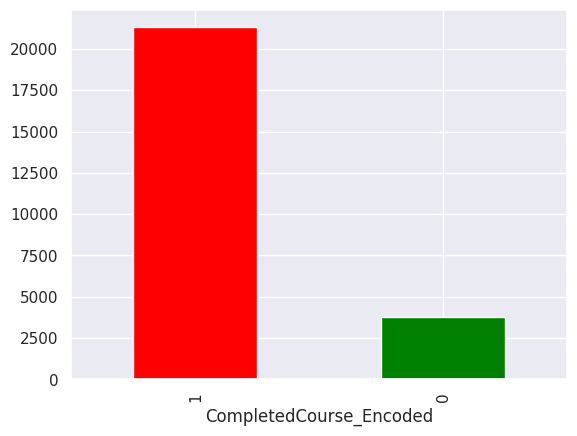

In [ ]:
target.value_counts().plot.bar(color=['red', 'green']) # Checking for whether the target variable is unbalance or not

In [ ]:
pip install xgboost

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score, roc_auc_score
import tensorflow as tf
import keras
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [ ]:
# Calculate scale_pos_weight
negative_samples = (y_train == 0).sum()
positive_samples = (y_train == 1).sum()
scale_pos_weight = negative_samples / positive_samples

print(f"scale_pos_weight: {scale_pos_weight}")

scale_pos_weight: 0.17632906935805656


In [ ]:
# Train XGBoost model
model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    objective='binary:logistic',       # For binary classification
    eval_metric='logloss',             # Evaluation metric
    enable_categorical= True,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.83      0.42       749
           1       0.96      0.62      0.76      4263

    accuracy                           0.66      5012
   macro avg       0.62      0.73      0.59      5012
weighted avg       0.85      0.66      0.71      5012

[[ 624  125]
 [1599 2664]]


In [ ]:
# ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc_xgb}")

ROC-AUC Score: 0.7290114240991272


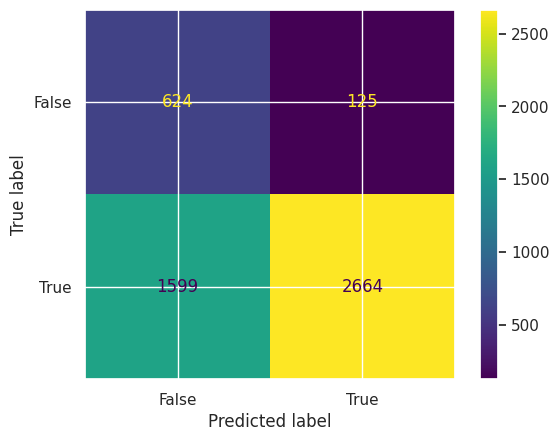

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    model,
    X,
    target,
    # Training sizes to test. Here, from 10% to 100% of the dataset, with 5 steps
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,  # 5-fold cross-validation
    n_jobs=4,  # Use all available cores
    scoring='accuracy'  # Choose appropriate scoring method for your problem
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

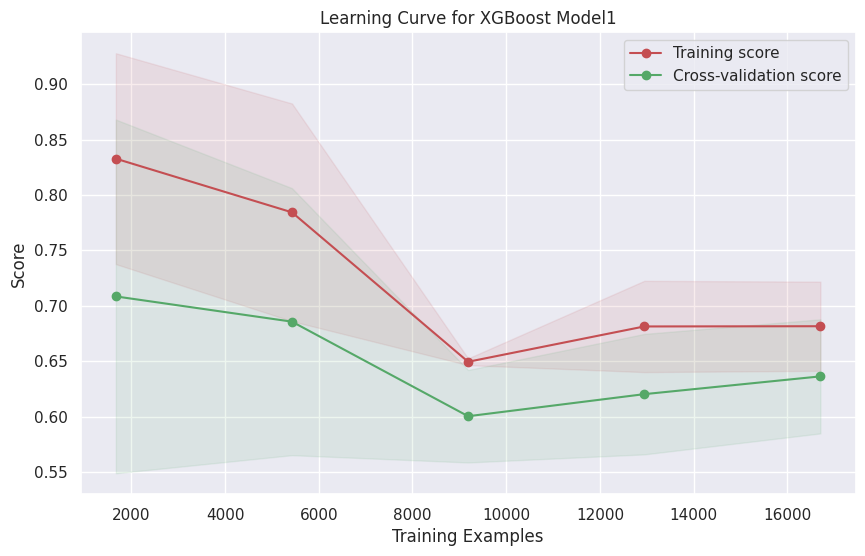

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for XGBoost Model1")
plt.xlabel("Training Examples")
plt.ylabel("Score")

# Plot training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot validation scores
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

**Tuned XGB Model**

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=XGBClassifier(scale_pos_weight=scale_pos_weight, objective='binary:logistic', eval_metric='logloss', enable_categorical=True, random_state=42),
    param_grid=param_grid,
    scoring='f1',  # Use F1-score for imbalanced datasets
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
best_model_xgb1 = grid_search.best_estimator_
y_predt = best_model_xgb1.predict(X_test)
print(classification_report(y_test, y_predt))

Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.31      0.71      0.43       749
           1       0.93      0.72      0.81      4263

    accuracy                           0.72      5012
   macro avg       0.62      0.72      0.62      5012
weighted avg       0.84      0.72      0.76      5012



In [ ]:
# ROC-AUC score
roc_auc_T = roc_auc_score(y_test, y_predt)
print(f"ROC-AUC Score for tuned Xgb: {roc_auc_T}")

ROC-AUC Score for tuned Xgb: 0.7167487684729064


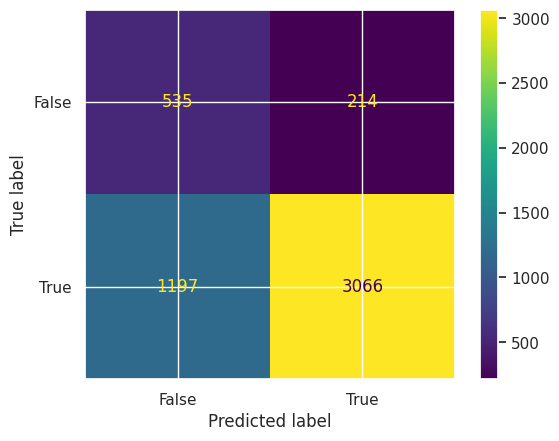

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predt)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model_xgb1,
    X,
    target,
    # Training sizes to test. Here, from 10% to 100% of the dataset, with 5 steps
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,  # 5-fold cross-validation
    n_jobs=4,  # Use all available cores
    scoring='accuracy'  # Choose appropriate scoring method for your problem
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

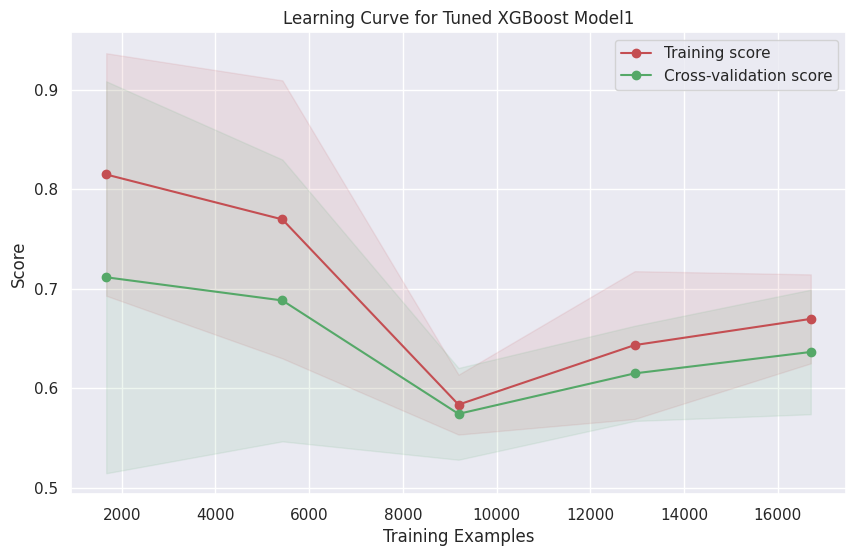

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Tuned XGBoost Model1")
plt.xlabel("Training Examples")
plt.ylabel("Score")

# Plot training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot validation scores
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

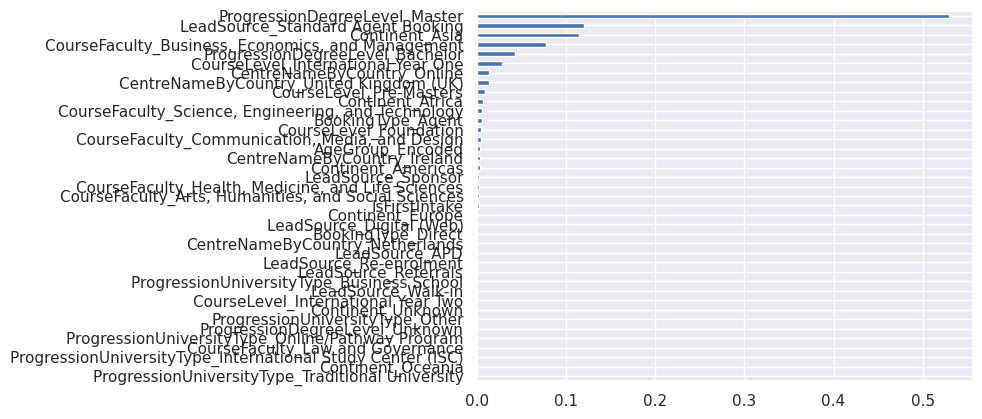

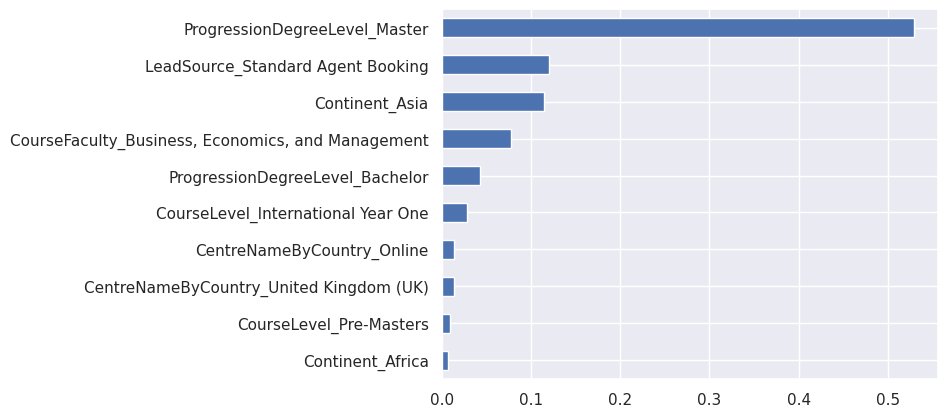

In [ ]:
feature_importance = pd.Series(best_model_xgb1.feature_importances_, index=X_train.columns).sort_values()

feature_importance.plot.barh()
plt.show()

feature_importance.iloc[-10:].plot.barh()
plt.show()

In [ ]:
import shap
shap.initjs()

shap_ex = shap.TreeExplainer(best_model_xgb1)
vals = shap_ex(X_test)

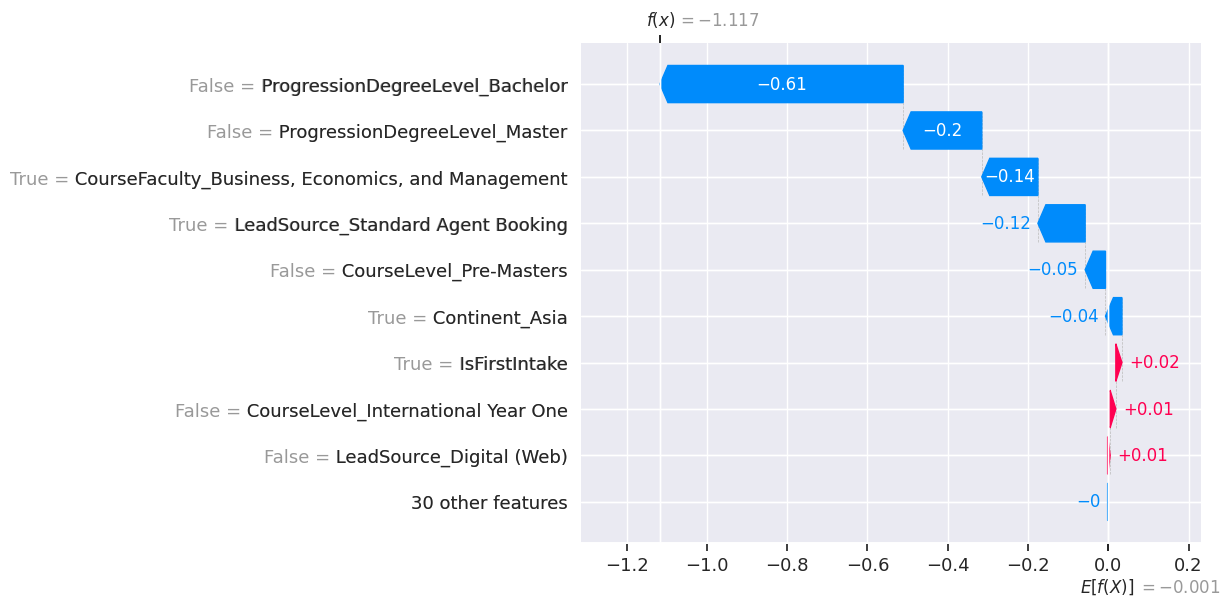

In [ ]:
# Waterfall plot
shap.plots.waterfall(vals[14])

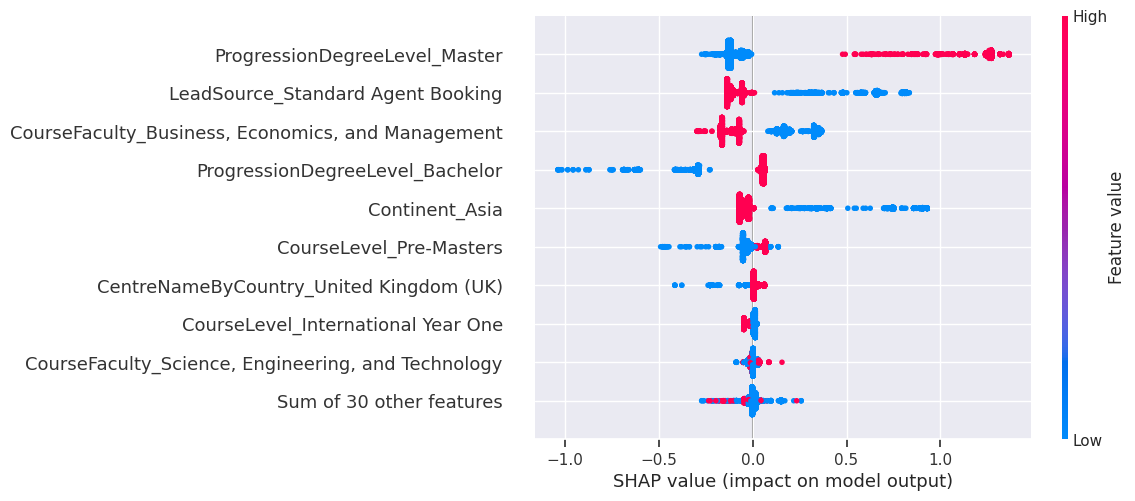

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(vals)

**Neural Network**

In [ ]:
# One-hot encode the 'Category' column
X_encoded = pd.get_dummies(X, columns=['AgeGroup_Encoded'])

print(X_encoded)

       IsFirstIntake  BookingType_Agent  BookingType_Direct  LeadSource_APD  \
0               True               True               False           False   
1              False               True               False           False   
2              False               True               False           False   
3               True               True               False           False   
4               True               True               False           False   
...              ...                ...                 ...             ...   
25054          False               True               False           False   
25055          False               True               False           False   
25056          False               True               False           False   
25057          False               True               False           False   
25058          False               True               False           False   

       LeadSource_Digital (Web)  LeadSource_Re-enro

In [ ]:
# Split the data into training and testing sets.
X_traind, X_testd, y_traind, y_testd = train_test_split(X_encoded, target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=target)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),  # Convert list to NumPy array
    y=y_traind
)

# Convert class weights to a dictionary
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Class Weights: {class_weight_dict}")

Class Weights: {0: 3.337828837828838, 1: 0.5880955174841587}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC

# Function to create a classification model.
def create_model(learning_rate=0.001, activation='relu'):
    inputs = Input(shape=(X_traind.shape[1],))
    x = Dense(64, activation=activation)(inputs)
    x = Dense(32, activation=activation)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', Precision(), Recall(), AUC(name='auc')])

    return model

In [ ]:
# Train the model
modelNN = create_model(learning_rate=0.001, activation='relu')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Train and evaluate the model.
def train_evaluate_model(model, X_train, y_train,
                         X_test, y_test, epochs=50,
                         batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_test, y_test),
                        verbose=0, class_weight=class_weight_dict)

   # Evaluate on test set.
    y_pred_proba = model.predict(X_test)
    y_predNN = (y_pred_proba > 0.5).astype(int)  # Threshold for binary classification

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_predNN)
    precision = precision_score(y_test, y_predNN)
    recall = recall_score(y_test, y_predNN)
    auc = AUC(name='auc')(y_test, y_pred_proba).numpy()
    # Generate Confusion Matrix
    cm = confusion_matrix(y_test, y_predNN)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'auc': auc,
        'history': history,
        'confusion_matrix': cm
    }

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


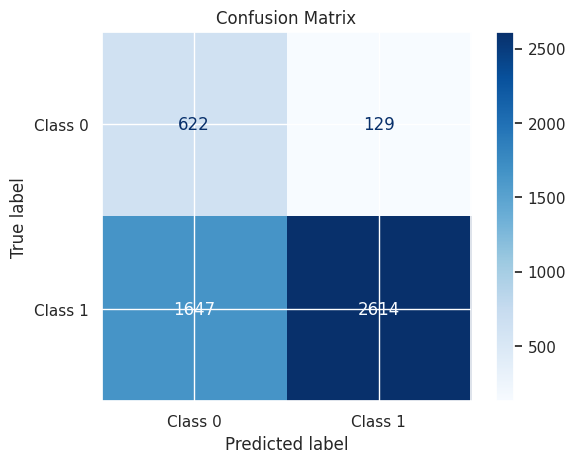

{'accuracy': 0.6456504389465283,
 'precision': 0.9529711994166971,
 'recall': 0.6134710161933818,
 'auc': 0.7645609,
 'history': <keras.src.callbacks.history.History at 0x7b842fe9ecd0>,
 'confusion_matrix': array([[ 622,  129],
        [1647, 2614]])}

In [ ]:
train_evaluate_model(modelNN, X_traind, y_traind,
                         X_testd, y_testd, epochs=10,
                         batch_size=32 )

In [ ]:
history = modelNN.fit(X_traind, y_traind, epochs=10, batch_size=32, validation_data=(X_testd, y_testd), verbose=0, class_weight=class_weight_dict)

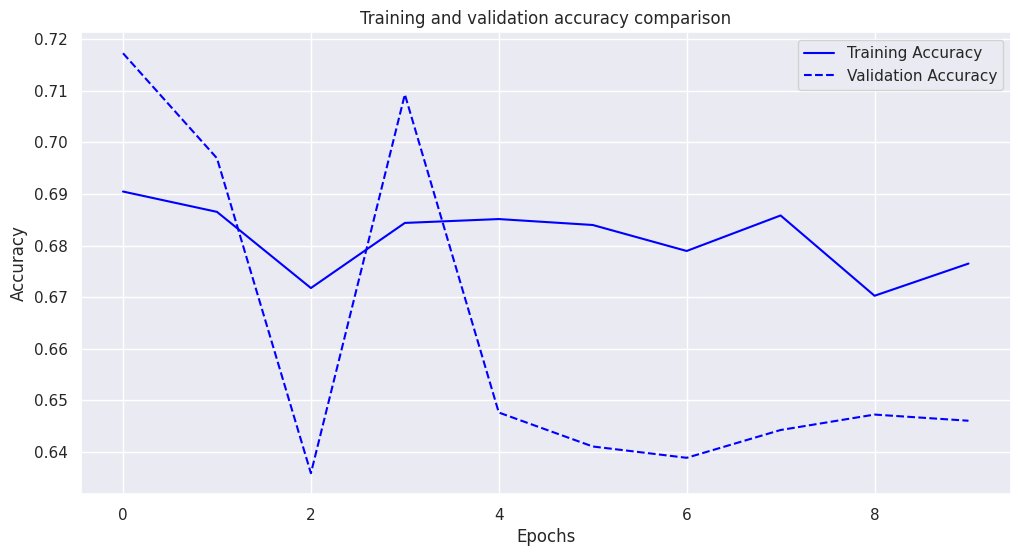

In [ ]:
# Plot accuracy.
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='--')
plt.title('Training and validation accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Tuned Neural Network**

In [ ]:
# Train and evaluate the model.
def train_evaluate_modelT(model, X_train, y_train,
                         X_test, y_test, epochs=10,
                         batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=0)

    # Evaluate on test set.
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, history

In [ ]:
# Hyperparameter tuning.
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
activations = ['relu', 'tanh', 'sigmoid']

results = []

# Create a for loop for each vector.
for lr in learning_rates:
    for bs in batch_sizes:
        for activation in activations:
            model = create_model(learning_rate=lr,
                                 activation=activation)
            accuracy, history = train_evaluate_modelT(model, X_traind,
                                                     y_traind, X_testd,
                                                     y_testd, batch_size=bs)
            results.append({'learning_rate': lr,
                            'batch_size': bs,
                            'activation': activation,
                            'accuracy': accuracy})

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
# Display the results.
results_df = pd.DataFrame(results)

# Pivot the table for better visibility.
pivoted_df = results_df.pivot_table(index=['learning_rate',
                                           'batch_size'],
                                    columns='activation',
                                    values='accuracy')

# View the DataFrame.
pivoted_df

activation                    relu   sigmoid      tanh
learning_rate batch_size                              
0.001         32          0.856345  0.854948  0.855347
              64          0.856345  0.852753  0.853751
              128         0.856943  0.853551  0.854948
0.010         32          0.856943  0.855746  0.856145
              64          0.856145  0.856345  0.855148
              128         0.856943  0.854948  0.856544
0.100         32          0.850160  0.850160  0.850160
              64          0.850160  0.850160  0.853751
              128         0.853551  0.854749  0.850160

In [ ]:
# Train the model
modelNNT = create_model(learning_rate=0.010, activation='relu')

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


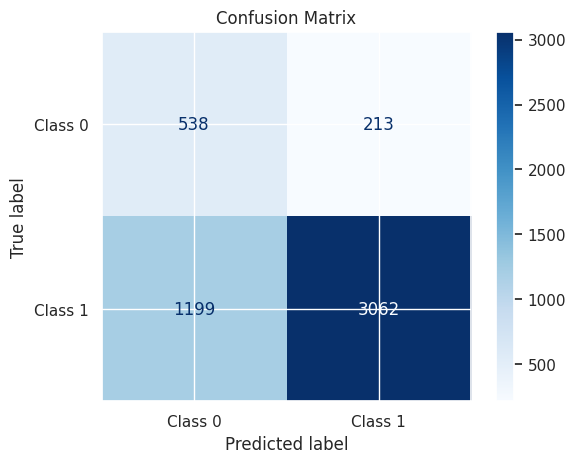

{'accuracy': 0.7182761372705507,
 'precision': 0.9349618320610688,
 'recall': 0.7186106547758742,
 'auc': 0.7719941,
 'history': <keras.src.callbacks.history.History at 0x7b8431cd7590>,
 'confusion_matrix': array([[ 538,  213],
        [1199, 3062]])}

In [ ]:
train_evaluate_model(modelNNT, X_traind, y_traind,
                         X_testd, y_testd, epochs=50,
                         batch_size=32 )

In [ ]:
historyT = modelNNT.fit(X_traind, y_traind, epochs=50, batch_size=32, validation_data=(X_testd, y_testd), verbose=0, class_weight=class_weight_dict)

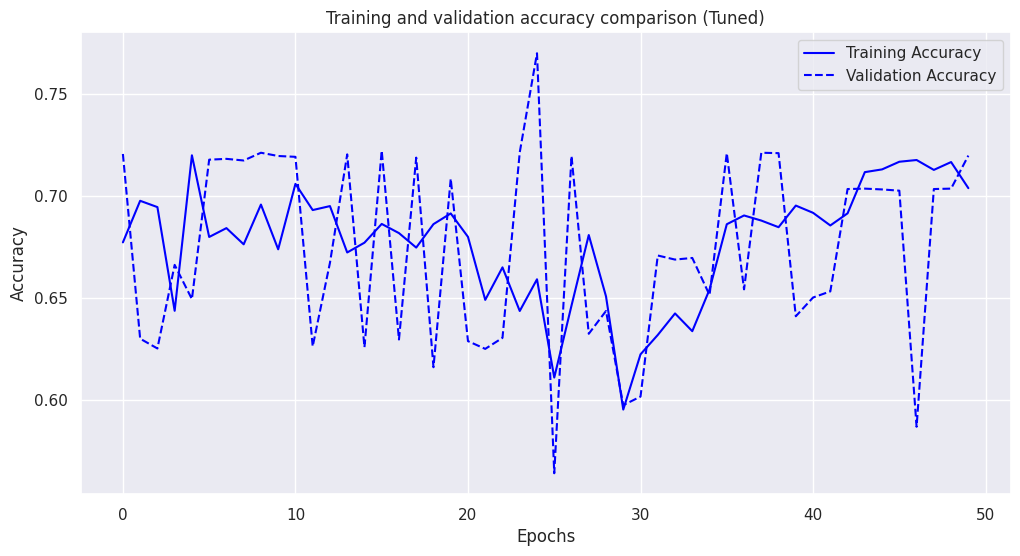

In [ ]:
# Plot accuracy.
plt.figure(figsize=(12, 6))
plt.plot(historyT.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(historyT.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='--')
plt.title('Training and validation accuracy comparison (Tuned)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Stage 2 data

In [ ]:
# File URL
file_url = "https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ"

In [ ]:
# File ID from Google Drive link
file_id = "1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ"
url2 = f"https://drive.google.com/uc?id={file_id}"

# Download the file
gdown.download(url2, "stage2.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ
To: /content/stage2.csv
100%|██████████| 6.20M/6.20M [00:00<00:00, 45.5MB/s]


'stage2.csv'

**Stage 2: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.



In [ ]:
# loading the dataset
stage2_df = pd.read_csv("stage2.csv")
print(stage2_df.shape)
stage2_df.head()

(25059, 18)


CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  
0  University of Aberdeen                     NaN                       NaN  
1  University of Aberdeen                    93.0                       5.0  
2  University of Aberdeen                    92.0                       6.0  
3  University of Aberdeen                    67.0                      15.0  
4  University of Aberdeen                     NaN                       NaN

In [ ]:
# Data description and exploration
stage2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   LearnerCode               25059 non-null  int64  
 2   BookingType               25059 non-null  object 
 3   LeadSource                25059 non-null  object 
 4   DiscountType              7595 non-null   object 
 5   DateofBirth               25059 non-null  object 
 6   Gender                    25059 non-null  object 
 7   Nationality               25059 non-null  object 
 8   HomeState                 8925 non-null   object 
 9   HomeCity                  21611 non-null  object 
 10  CourseLevel               25059 non-null  object 
 11  CourseName                25059 non-null  object 
 12  IsFirstIntake             25059 non-null  bool   
 13  CompletedCourse           25059 non-null  object 
 14  Progre

**Data Cleaning**

In [ ]:
# Split the column by the first space
stage2_df[['ProgressionDegreeLevel', 'Other']] = stage2_df['ProgressionDegree'].str.split(' ', n=1, expand=True)

In [ ]:
stage2_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  \
0  University of Aberdeen                     NaN                       NaN   
1  University of Aberdeen                    93.0                       5.0   
2  University of Aberdeen                    92.0                       6.0   
3  University of Aberdeen                    67.0                      15.0   
4  University of Aberdeen                     NaN                       NaN   

  ProgressionDegreeLevel                                      Other  
0                    Msc  Econ Accounting and Investment Management  
1                    BSc                        Biological Sciences  
2                     MA                                    Finance  
3                     MA                        Business Management  
4                    MSc          International Business Management

In [ ]:
# Grouping of variables
# Use map() for replacement
stage2_df['ProgressionDegreeLevel'] = stage2_df['ProgressionDegreeLevel'].map(mapping1).fillna(stage2_df['ProgressionDegreeLevel'])

# Display the updated DataFrame
stage2_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  \
0  University of Aberdeen                     NaN                       NaN   
1  University of Aberdeen                    93.0                       5.0   
2  University of Aberdeen                    92.0                       6.0   
3  University of Aberdeen                    67.0                      15.0   
4  University of Aberdeen                     NaN                       NaN   

  ProgressionDegreeLevel                                      Other  
0                 Master  Econ Accounting and Investment Management  
1               Bachelor                        Biological Sciences  
2                 Master                                    Finance  
3                 Master                        Business Management  
4                    MSc          International Business Management

In [ ]:
# Get unique values
unique_degrees = stage2_df['ProgressionDegreeLevel'].unique()
print(unique_degrees)

['Master' 'Bachelor' 'MSc' 'MSC' nan 'BSC' 'Bsc' 'Beng' 'Bcomm' 'BENG'
 'BEng/MEng' 'BSc(Hons)' 'Mpharm' 'BSc/Msci' 'LAW' 'media' 'Meng;' 'Meng'
 'MScÂ\xa0' 'Ma' 'MPlan' 'management' 'BENg']


In [ ]:
# Use map() for replacement
stage2_df['ProgressionDegreeLevel'] = stage2_df['ProgressionDegreeLevel'].map(mapping2).fillna(stage2_df['ProgressionDegreeLevel'])
stage2_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  \
0  University of Aberdeen                     NaN                       NaN   
1  University of Aberdeen                    93.0                       5.0   
2  University of Aberdeen                    92.0                       6.0   
3  University of Aberdeen                    67.0                      15.0   
4  University of Aberdeen                     NaN                       NaN   

  ProgressionDegreeLevel                                      Other  
0                 Master  Econ Accounting and Investment Management  
1               Bachelor                        Biological Sciences  
2                 Master                                    Finance  
3                 Master                        Business Management  
4                 Master          International Business Management

In [ ]:
# Get unique values
unique_degrees = stage2_df['ProgressionDegreeLevel'].unique()
print(unique_degrees)

['Master' 'Bachelor' nan]


In [ ]:
# Replace NaN with None
stage2_df['ProgressionDegreeLevel'] = stage2_df['ProgressionDegreeLevel'].replace(
    {np.nan: 'Unknown'}
)

stage2_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  \
0  University of Aberdeen                     NaN                       NaN   
1  University of Aberdeen                    93.0                       5.0   
2  University of Aberdeen                    92.0                       6.0   
3  University of Aberdeen                    67.0                      15.0   
4  University of Aberdeen                     NaN                       NaN   

  ProgressionDegreeLevel                                      Other  
0                 Master  Econ Accounting and Investment Management  
1               Bachelor                        Biological Sciences  
2                 Master                                    Finance  
3                 Master                        Business Management  
4                 Master          International Business Management

In [ ]:
# Get unique values
unique_degrees = stage2_df['ProgressionDegreeLevel'].unique()
print(unique_degrees)

['Master' 'Bachelor' 'Unknown']


In [ ]:
# Grouping of variables
# Use map() for replacement
stage2_df['CourseFaculty'] = stage2_df['CourseName'].map(mapping3).fillna(stage2_df['CourseName'])
stage2_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity  ...  \
0                 Nanjing  ...   
1                   Xi'an  ...   
2                 Chengdu  ...   
3  LIUYANG CITY ;CHANGSHA  ...   
4                  Xiamen  ...   

                                          CourseName IsFirstIntake  \
0                       Business and Law Pre-Masters          True   
1   Life Sciences Undergraduate Foundation Programme         False   
2  Business Management and Finance International ...         False   
3  Business Management and Finance International ...          True   
4                       Business and Law Pre-Masters          True   

   CompletedCourse                              ProgressionDegree  \
0              Yes  Msc Econ Accounting and Investment Management   
1              Yes                        BSc Biological Sciences   
2              Yes                                     MA Finance   
3              Yes                         MA Business Management   
4              Yes          MSc International Business Management   

    ProgressionUniversity AuthorisedAbsenceCount  UnauthorisedAbsenceCount  \
0  University of Aberdeen                    NaN                       NaN   
1  University of Aberdeen                   93.0                       5.0   
2  University of Aberdeen                   92.0                       6.0   
3  University of Aberdeen                   67.0                      15.0   
4  University of Aberdeen                    NaN                       NaN   

   ProgressionDegreeLevel                                      Other  \
0                  Master  Econ Accounting and Investment Management   
1                Bachelor                        Biological Sciences   
2                  Master                                    Finance   
3                  Master                        Business Management   
4                  Master          International Business Management   

                         CourseFaculty  
0  Business, Economics, and Management  
1  Health, Medicine, and Life Sciences  
2  Business, Economics, and Management  
3  Business, Economics, and Management  
4  Business, Economics, and Management  

[5 rows x 21 columns]

In [ ]:
# Convert 'DateOfBirth' column to datetime
stage2_df['DateofBirth'] = pd.to_datetime(stage2_df['DateofBirth'])


# Apply the function to the 'DateOfBirth' column
stage2_df['Age'] = stage2_df['DateofBirth'].apply(calculate_age)

stage2_df.head()

<ipython-input-64-6533d2c10716>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  stage2_df['DateofBirth'] = pd.to_datetime(stage2_df['DateofBirth'])


CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  1998-01-13   Male     Chinese  Jianye District; Jiangsu Province   
1  1998-02-12   Male     Chinese                                NaN   
2  2000-04-07   Male     Chinese                                NaN   
3  1999-05-18   Male     Chinese                                NaN   
4  1996-04-19   Male     Chinese                                NaN   

                 HomeCity  ... IsFirstIntake CompletedCourse  \
0                 Nanjing  ...          True             Yes   
1                   Xi'an  ...         False             Yes   
2                 Chengdu  ...         False             Yes   
3  LIUYANG CITY ;CHANGSHA  ...          True             Yes   
4                  Xiamen  ...          True             Yes   

                               ProgressionDegree   ProgressionUniversity  \
0  Msc Econ Accounting and Investment Management  University of Aberdeen   
1                        BSc Biological Sciences  University of Aberdeen   
2                                     MA Finance  University of Aberdeen   
3                         MA Business Management  University of Aberdeen   
4          MSc International Business Management  University of Aberdeen   

  AuthorisedAbsenceCount UnauthorisedAbsenceCount  ProgressionDegreeLevel  \
0                    NaN                      NaN                  Master   
1                   93.0                      5.0                Bachelor   
2                   92.0                      6.0                  Master   
3                   67.0                     15.0                  Master   
4                    NaN                      NaN                  Master   

                                       Other  \
0  Econ Accounting and Investment Management   
1                        Biological Sciences   
2                                    Finance   
3                        Business Management   
4          International Business Management   

                         CourseFaculty Age  
0  Business, Economics, and Management  27  
1  Health, Medicine, and Life Sciences  27  
2  Business, Economics, and Management  24  
3  Business, Economics, and Management  25  
4  Business, Economics, and Management  28  

[5 rows x 22 columns]

In [ ]:
unique_age = stage2_df['Age'].unique()
print(unique_age)

[27 24 25 28 22 23 26 43 29 30 33 31 21 44 39 32 35 20 40 36 34 19 53 50
 47 38 41 45 42 51 48 37 46 49 55 62 57 54]


In [ ]:
# Group the 'Age' column into bins
stage2_df['AgeGroup'] = pd.cut(stage2_df['Age'], bins=bins, labels=labels, right=False)

stage2_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  1998-01-13   Male     Chinese  Jianye District; Jiangsu Province   
1  1998-02-12   Male     Chinese                                NaN   
2  2000-04-07   Male     Chinese                                NaN   
3  1999-05-18   Male     Chinese                                NaN   
4  1996-04-19   Male     Chinese                                NaN   

                 HomeCity  ... CompletedCourse  \
0                 Nanjing  ...             Yes   
1                   Xi'an  ...             Yes   
2                 Chengdu  ...             Yes   
3  LIUYANG CITY ;CHANGSHA  ...             Yes   
4                  Xiamen  ...             Yes   

                               ProgressionDegree   ProgressionUniversity  \
0  Msc Econ Accounting and Investment Management  University of Aberdeen   
1                        BSc Biological Sciences  University of Aberdeen   
2                                     MA Finance  University of Aberdeen   
3                         MA Business Management  University of Aberdeen   
4          MSc International Business Management  University of Aberdeen   

  AuthorisedAbsenceCount UnauthorisedAbsenceCount ProgressionDegreeLevel  \
0                    NaN                      NaN                 Master   
1                   93.0                      5.0               Bachelor   
2                   92.0                      6.0                 Master   
3                   67.0                     15.0                 Master   
4                    NaN                      NaN                 Master   

                                       Other  \
0  Econ Accounting and Investment Management   
1                        Biological Sciences   
2                                    Finance   
3                        Business Management   
4          International Business Management   

                         CourseFaculty Age AgeGroup  
0  Business, Economics, and Management  27    19-28  
1  Health, Medicine, and Life Sciences  27    19-28  
2  Business, Economics, and Management  24    19-28  
3  Business, Economics, and Management  25    19-28  
4  Business, Economics, and Management  28    19-28  

[5 rows x 23 columns]

In [ ]:
# Map nationalities to continents and replacing null
stage2_df['Continent'] = stage2_df['Nationality'].map(nationality_to_continent)

stage2_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  1998-01-13   Male     Chinese  Jianye District; Jiangsu Province   
1  1998-02-12   Male     Chinese                                NaN   
2  2000-04-07   Male     Chinese                                NaN   
3  1999-05-18   Male     Chinese                                NaN   
4  1996-04-19   Male     Chinese                                NaN   

                 HomeCity  ...                              ProgressionDegree  \
0                 Nanjing  ...  Msc Econ Accounting and Investment Management   
1                   Xi'an  ...                        BSc Biological Sciences   
2                 Chengdu  ...                                     MA Finance   
3  LIUYANG CITY ;CHANGSHA  ...                         MA Business Management   
4                  Xiamen  ...          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount UnauthorisedAbsenceCount  \
0  University of Aberdeen                     NaN                      NaN   
1  University of Aberdeen                    93.0                      5.0   
2  University of Aberdeen                    92.0                      6.0   
3  University of Aberdeen                    67.0                     15.0   
4  University of Aberdeen                     NaN                      NaN   

  ProgressionDegreeLevel                                      Other  \
0                 Master  Econ Accounting and Investment Management   
1               Bachelor                        Biological Sciences   
2                 Master                                    Finance   
3                 Master                        Business Management   
4                 Master          International Business Management   

                         CourseFaculty  Age AgeGroup Continent  
0  Business, Economics, and Management   27    19-28      Asia  
1  Health, Medicine, and Life Sciences   27    19-28      Asia  
2  Business, Economics, and Management   24    19-28      Asia  
3  Business, Economics, and Management   25    19-28      Asia  
4  Business, Economics, and Management   28    19-28      Asia  

[5 rows x 24 columns]

In [ ]:
# Get unique values
unique_cont = stage2_df['Continent'].unique()
print(unique_cont)

['Asia' 'Africa' 'Europe' 'Americas' 'Unknown' 'Oceania']


In [ ]:
# Map the institution types to the DataFrame
stage2_df['ProgressionUniversityType'] = stage2_df['ProgressionUniversity'].map(institution_type_dict)
stage2_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  1998-01-13   Male     Chinese  Jianye District; Jiangsu Province   
1  1998-02-12   Male     Chinese                                NaN   
2  2000-04-07   Male     Chinese                                NaN   
3  1999-05-18   Male     Chinese                                NaN   
4  1996-04-19   Male     Chinese                                NaN   

                 HomeCity  ...   ProgressionUniversity AuthorisedAbsenceCount  \
0                 Nanjing  ...  University of Aberdeen                    NaN   
1                   Xi'an  ...  University of Aberdeen                   93.0   
2                 Chengdu  ...  University of Aberdeen                   92.0   
3  LIUYANG CITY ;CHANGSHA  ...  University of Aberdeen                   67.0   
4                  Xiamen  ...  University of Aberdeen                    NaN   

   UnauthorisedAbsenceCount ProgressionDegreeLevel  \
0                       NaN                 Master   
1                       5.0               Bachelor   
2                       6.0                 Master   
3                      15.0                 Master   
4                       NaN                 Master   

                                       Other  \
0  Econ Accounting and Investment Management   
1                        Biological Sciences   
2                                    Finance   
3                        Business Management   
4          International Business Management   

                         CourseFaculty  Age  AgeGroup Continent  \
0  Business, Economics, and Management   27     19-28      Asia   
1  Health, Medicine, and Life Sciences   27     19-28      Asia   
2  Business, Economics, and Management   24     19-28      Asia   
3  Business, Economics, and Management   25     19-28      Asia   
4  Business, Economics, and Management   28     19-28      Asia   

  ProgressionUniversityType  
0    Traditional University  
1    Traditional University  
2    Traditional University  
3    Traditional University  
4    Traditional University  

[5 rows x 25 columns]

In [ ]:
# Map the ISCs to their countries
stage2_df['CentreNameByCountry'] = stage2_df['CentreName'].map(country_grouping_dict)

In [ ]:
# removing the missing values in the two since the null values is <2%
columns_to_check = ['UnauthorisedAbsenceCount', 'AuthorisedAbsenceCount']  # Specify the columns here
stage2_df = stage2_df.dropna(subset=columns_to_check)

In [ ]:
stage2_df['AbsenceCount'] = stage2_df['UnauthorisedAbsenceCount'] + stage2_df['AuthorisedAbsenceCount']

In [ ]:
stage2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24851 entries, 1 to 25058
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CentreName                 24851 non-null  object        
 1   LearnerCode                24851 non-null  int64         
 2   BookingType                24851 non-null  object        
 3   LeadSource                 24851 non-null  object        
 4   DiscountType               7538 non-null   object        
 5   DateofBirth                24851 non-null  datetime64[ns]
 6   Gender                     24851 non-null  object        
 7   Nationality                24851 non-null  object        
 8   HomeState                  8859 non-null   object        
 9   HomeCity                   21440 non-null  object        
 10  CourseLevel                24851 non-null  object        
 11  CourseName                 24851 non-null  object        
 12  IsFirstIn

In [ ]:
# Get the number of unique values for all columns
unique_counts = stage2_df.nunique()

print(unique_counts)

CentreName                      19
LearnerCode                  24672
BookingType                      2
LeadSource                       7
DiscountType                    11
DateofBirth                   4679
Gender                           2
Nationality                    150
HomeState                     2436
HomeCity                      5860
CourseLevel                      4
CourseName                     172
IsFirstIntake                    2
CompletedCourse                  2
ProgressionDegree             2600
ProgressionUniversity           39
AuthorisedAbsenceCount         190
UnauthorisedAbsenceCount       258
ProgressionDegreeLevel           3
Other                         2248
CourseFaculty                    6
Age                             38
AgeGroup                         5
Continent                        6
ProgressionUniversityType        5
CentreNameByCountry              4
AbsenceCount                   310
dtype: int64


In [ ]:
# LearnerCode, Age, DateofBirth and Other are some of the useless columns in the dataset
# DiscountType and HomeState are columns with more than 50% missing values
# Drop the those columns
stage2_dfclean = stage2_df.drop(['LearnerCode', 'Other', 'Age', 'DateofBirth', 'Nationality', 'CentreName','UnauthorisedAbsenceCount', 'AuthorisedAbsenceCount',
                                 'DiscountType', 'HomeState', 'HomeCity', 'ProgressionDegree','CourseName', 'ProgressionUniversity'], axis=1)

stage2_dfclean.head()

BookingType              LeadSource Gender             CourseLevel  \
1       Agent  Standard Agent Booking   Male              Foundation   
2       Agent  Standard Agent Booking   Male  International Year Two   
3       Agent  Standard Agent Booking   Male  International Year Two   
5       Agent  Standard Agent Booking   Male  International Year Two   
6       Agent  Standard Agent Booking   Male              Foundation   

   IsFirstIntake CompletedCourse ProgressionDegreeLevel  \
1          False             Yes               Bachelor   
2          False             Yes                 Master   
3           True             Yes                 Master   
5           True             Yes                 Master   
6          False              No                 Master   

                         CourseFaculty AgeGroup Continent  \
1  Health, Medicine, and Life Sciences    19-28      Asia   
2  Business, Economics, and Management    19-28      Asia   
3  Business, Economics, and Management    19-28      Asia   
5  Business, Economics, and Management    19-28      Asia   
6  Business, Economics, and Management    19-28      Asia   

  ProgressionUniversityType  CentreNameByCountry  AbsenceCount  
1    Traditional University  United Kingdom (UK)          98.0  
2    Traditional University  United Kingdom (UK)          98.0  
3    Traditional University  United Kingdom (UK)          82.0  
5    Traditional University  United Kingdom (UK)          70.0  
6    Traditional University  United Kingdom (UK)          47.0

In [ ]:
# Get the number of unique values for all columns
unique_counts = stage2_dfclean.nunique()

print(unique_counts)

BookingType                    2
LeadSource                     7
Gender                         2
CourseLevel                    4
IsFirstIntake                  2
CompletedCourse                2
ProgressionDegreeLevel         3
CourseFaculty                  6
AgeGroup                       5
Continent                      6
ProgressionUniversityType      5
CentreNameByCountry            4
AbsenceCount                 310
dtype: int64


In [ ]:
# Ordinal encoding for Age Group
age_group_mapping = {
'19-28': 0, '29-38': 1, '39-48': 2, '49-58': 3, '59-68' :4
}
stage2_dfclean['AgeGroup_Encoded'] = stage2_dfclean['AgeGroup'].map(age_group_mapping)

In [ ]:
# Label encoding for CompletedCourse
stage2_dfclean['CompletedCourse_Encoded'] = stage2_dfclean['CompletedCourse'].map({'Yes': 1, 'No': 0})

In [ ]:
# Perform one-hot encoding
stage2_dfclean = pd.get_dummies(stage2_dfclean, columns=[
    'BookingType', 'LeadSource', 'CourseLevel', 'ProgressionDegreeLevel',
    'CourseFaculty', 'Continent', 'ProgressionUniversityType', 'CentreNameByCountry'
])

# Display the encoded DataFrame
stage2_dfclean.head()

Gender  IsFirstIntake CompletedCourse AgeGroup  AbsenceCount  \
1   Male          False             Yes    19-28          98.0   
2   Male          False             Yes    19-28          98.0   
3   Male           True             Yes    19-28          82.0   
5   Male           True             Yes    19-28          70.0   
6   Male          False              No    19-28          47.0   

  AgeGroup_Encoded  CompletedCourse_Encoded  BookingType_Agent  \
1                0                        1               True   
2                0                        1               True   
3                0                        1               True   
5                0                        1               True   
6                0                        0               True   

   BookingType_Direct  LeadSource_APD  ...  Continent_Unknown  \
1               False           False  ...              False   
2               False           False  ...              False   
3               False           False  ...              False   
5               False           False  ...              False   
6               False           False  ...              False   

   ProgressionUniversityType_Business School  \
1                                      False   
2                                      False   
3                                      False   
5                                      False   
6                                      False   

   ProgressionUniversityType_International Study Center (ISC)  \
1                                              False            
2                                              False            
3                                              False            
5                                              False            
6                                              False            

   ProgressionUniversityType_Online/Pathway Program  \
1                                             False   
2                                             False   
3                                             False   
5                                             False   
6                                             False   

   ProgressionUniversityType_Other  \
1                            False   
2                            False   
3                            False   
5                            False   
6                            False   

   ProgressionUniversityType_Traditional University  \
1                                              True   
2                                              True   
3                                              True   
5                                              True   
6                                              True   

   CentreNameByCountry_Ireland  CentreNameByCountry_Netherlands  \
1                        False                            False   
2                        False                            False   
3                        False                            False   
5                        False                            False   
6                        False                            False   

   CentreNameByCountry_Online  CentreNameByCountry_United Kingdom (UK)  
1                       False                                     True  
2                       False                                     True  
3                       False                                     True  
5                       False                                     True  
6                       False                                     True  

[5 rows x 44 columns]

In [ ]:
encoded_stage2_df = stage2_dfclean.drop(['AgeGroup', 'CompletedCourse', 'Gender'], axis=1)

print(encoded_stage2_df.shape)
encoded_stage2_df.head()

(24851, 41)


IsFirstIntake  AbsenceCount AgeGroup_Encoded  CompletedCourse_Encoded  \
1          False          98.0                0                        1   
2          False          98.0                0                        1   
3           True          82.0                0                        1   
5           True          70.0                0                        1   
6          False          47.0                0                        0   

   BookingType_Agent  BookingType_Direct  LeadSource_APD  \
1               True               False           False   
2               True               False           False   
3               True               False           False   
5               True               False           False   
6               True               False           False   

   LeadSource_Digital (Web)  LeadSource_Re-enrolment  LeadSource_Referrals  \
1                     False                    False                 False   
2                     False                    False                 False   
3                     False                    False                 False   
5                     False                    False                 False   
6                     False                    False                 False   

   ...  Continent_Unknown  ProgressionUniversityType_Business School  \
1  ...              False                                      False   
2  ...              False                                      False   
3  ...              False                                      False   
5  ...              False                                      False   
6  ...              False                                      False   

   ProgressionUniversityType_International Study Center (ISC)  \
1                                              False            
2                                              False            
3                                              False            
5                                              False            
6                                              False            

   ProgressionUniversityType_Online/Pathway Program  \
1                                             False   
2                                             False   
3                                             False   
5                                             False   
6                                             False   

   ProgressionUniversityType_Other  \
1                            False   
2                            False   
3                            False   
5                            False   
6                            False   

   ProgressionUniversityType_Traditional University  \
1                                              True   
2                                              True   
3                                              True   
5                                              True   
6                                              True   

   CentreNameByCountry_Ireland  CentreNameByCountry_Netherlands  \
1                        False                            False   
2                        False                            False   
3                        False                            False   
5                        False                            False   
6                        False                            False   

   CentreNameByCountry_Online  CentreNameByCountry_United Kingdom (UK)  
1                       False                                     True  
2                       False                                     True  
3                       False                                     True  
5                       False                                     True  
6                       False                                     True  

[5 rows x 41 columns]

In [ ]:
encoded_stage2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24851 entries, 1 to 25058
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   IsFirstIntake                                               24851 non-null  bool    
 1   AbsenceCount                                                24851 non-null  float64 
 2   AgeGroup_Encoded                                            24851 non-null  category
 3   CompletedCourse_Encoded                                     24851 non-null  int64   
 4   BookingType_Agent                                           24851 non-null  bool    
 5   BookingType_Direct                                          24851 non-null  bool    
 6   LeadSource_APD                                              24851 non-null  bool    
 7   LeadSource_Digital (Web)                                    24851 non-null  bool 

**Building Models**

In [ ]:
X2 = encoded_stage2_df.drop('CompletedCourse_Encoded', axis=1)  # Features
X2.head()

IsFirstIntake  AbsenceCount AgeGroup_Encoded  BookingType_Agent  \
1          False          98.0                0               True   
2          False          98.0                0               True   
3           True          82.0                0               True   
5           True          70.0                0               True   
6          False          47.0                0               True   

   BookingType_Direct  LeadSource_APD  LeadSource_Digital (Web)  \
1               False           False                     False   
2               False           False                     False   
3               False           False                     False   
5               False           False                     False   
6               False           False                     False   

   LeadSource_Re-enrolment  LeadSource_Referrals  LeadSource_Sponsor  ...  \
1                    False                 False               False  ...   
2                    False                 False               False  ...   
3                    False                 False               False  ...   
5                    False                 False               False  ...   
6                    False                 False               False  ...   

   Continent_Unknown  ProgressionUniversityType_Business School  \
1              False                                      False   
2              False                                      False   
3              False                                      False   
5              False                                      False   
6              False                                      False   

   ProgressionUniversityType_International Study Center (ISC)  \
1                                              False            
2                                              False            
3                                              False            
5                                              False            
6                                              False            

   ProgressionUniversityType_Online/Pathway Program  \
1                                             False   
2                                             False   
3                                             False   
5                                             False   
6                                             False   

   ProgressionUniversityType_Other  \
1                            False   
2                            False   
3                            False   
5                            False   
6                            False   

   ProgressionUniversityType_Traditional University  \
1                                              True   
2                                              True   
3                                              True   
5                                              True   
6                                              True   

   CentreNameByCountry_Ireland  CentreNameByCountry_Netherlands  \
1                        False                            False   
2                        False                            False   
3                        False                            False   
5                        False                            False   
6                        False                            False   

   CentreNameByCountry_Online  CentreNameByCountry_United Kingdom (UK)  
1                       False                                     True  
2                       False                                     True  
3                       False                                     True  
5                       False                                     True  
6                       False                                     True  

[5 rows x 40 columns]

In [ ]:
target2 = encoded_stage2_df['CompletedCourse_Encoded'] # Target Dataset
target2

1        1
2        1
3        1
5        1
6        0
        ..
25054    1
25055    1
25056    1
25057    0
25058    1
Name: CompletedCourse_Encoded, Length: 24851, dtype: int64

<Axes: xlabel='CompletedCourse_Encoded'>

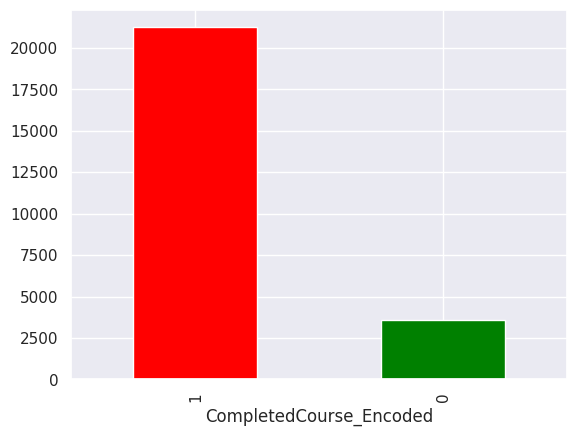

In [ ]:
target2.value_counts().plot.bar(color=['red', 'green']) # Checking for whether the target variable is unbalance or not

In [ ]:
# Split into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, target2, test_size=0.2, random_state=42)

In [ ]:
# Calculate scale_pos_weight to deal with the imbalance classes
negative_samples = (y_train2 == 0).sum()
positive_samples = (y_train2 == 1).sum()
scale_pos_weight = negative_samples / positive_samples

print(f"scale_pos_weight: {scale_pos_weight}")

scale_pos_weight: 0.16954935874808802


In [ ]:
# Train XGBoost model
model2 = XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    objective='binary:logistic',       # For binary classification
    eval_metric='logloss',             # Evaluation metric
    enable_categorical= True,
    random_state=42
)
model2.fit(X_train2, y_train2)

# Evaluate the model
y_pred2 = model2.predict(X_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.36      0.74      0.48       727
           1       0.95      0.77      0.85      4244

    accuracy                           0.77      4971
   macro avg       0.65      0.76      0.67      4971
weighted avg       0.86      0.77      0.80      4971



In [ ]:
# ROC-AUC score
roc_auc_xgb2 = roc_auc_score(y_test2, y_pred2)
print(f"ROC-AUC Score: {roc_auc_xgb2}")

ROC-AUC Score: 0.755852586449419


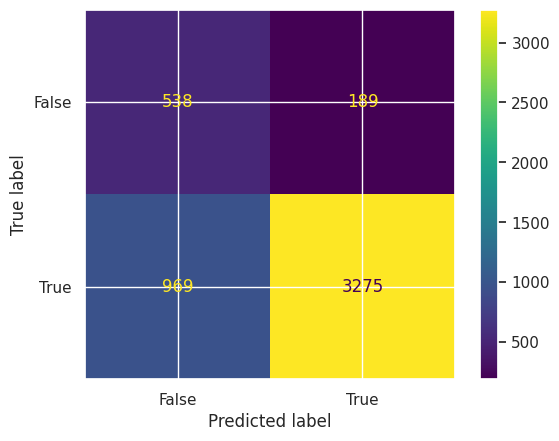

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test2, y_pred2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    model2,
    X2,
    target2,
    # Training sizes to test. Here, from 10% to 100% of the dataset, with 5 steps
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,  # 5-fold cross-validation
    n_jobs=4,  # Use all available cores
    scoring='accuracy'  # Choose appropriate scoring method for your problem
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

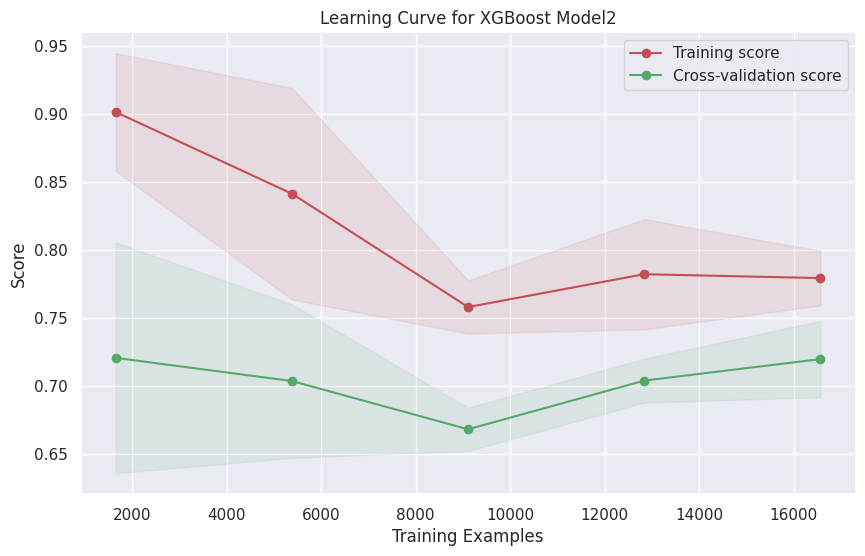

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for XGBoost Model2")
plt.xlabel("Training Examples")
plt.ylabel("Score")

# Plot training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot validation scores
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

**Tuned XGB Model**

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=XGBClassifier(scale_pos_weight=scale_pos_weight, objective='binary:logistic', eval_metric='logloss', enable_categorical=True, random_state=42),
    param_grid=param_grid,
    scoring='f1',  # Use F1-score for imbalanced datasets
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train2, y_train2)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
best_model_xgb2 = grid_search.best_estimator_
y_predt2 = best_model_xgb2.predict(X_test2)
print(classification_report(y_test2, y_predt2))

Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.35      0.72      0.47       727
           1       0.94      0.77      0.85      4244

    accuracy                           0.76      4971
   macro avg       0.65      0.75      0.66      4971
weighted avg       0.86      0.76      0.79      4971



In [ ]:
# ROC-AUC score
roc_auc_T2 = roc_auc_score(y_test2, y_predt2)
print(f"ROC-AUC Score for tuned Xgb: {roc_auc_T2}")

ROC-AUC Score for tuned Xgb: 0.7457335997936078


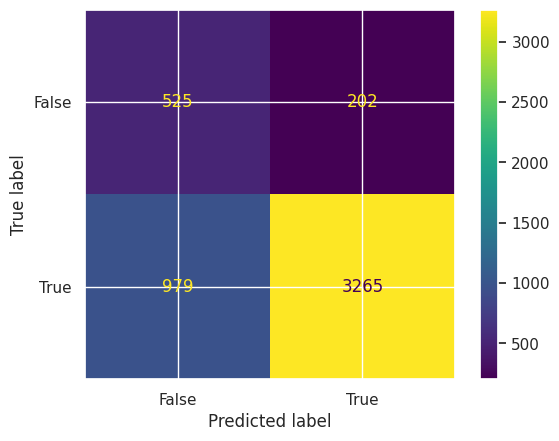

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test2, y_predt2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

C**ross Validation**

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model_xgb2,
    X2,
    target2,
    # Training sizes to test. Here, from 10% to 100% of the dataset, with 5 steps
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,  # 5-fold cross-validation
    n_jobs=4,  # Use all available cores
    scoring='accuracy'  # Choose appropriate scoring method for your problem
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

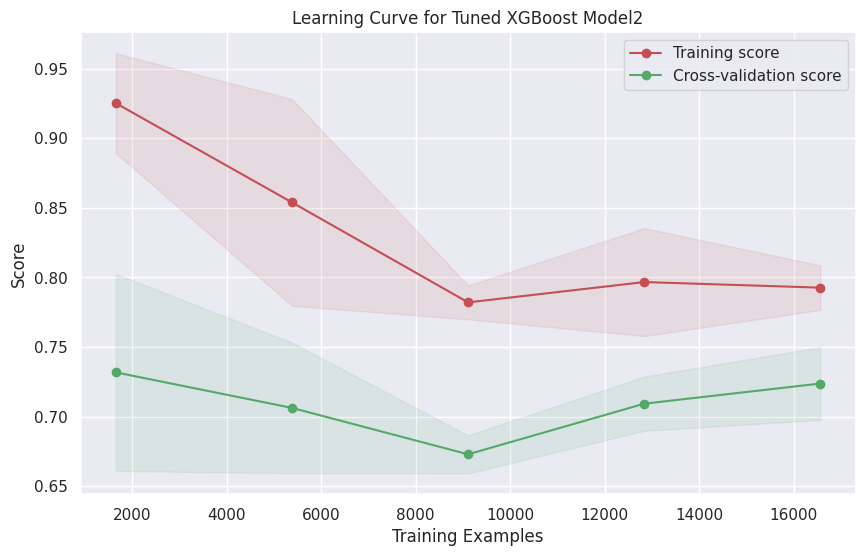

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Tuned XGBoost Model2")
plt.xlabel("Training Examples")
plt.ylabel("Score")

# Plot training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot validation scores
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

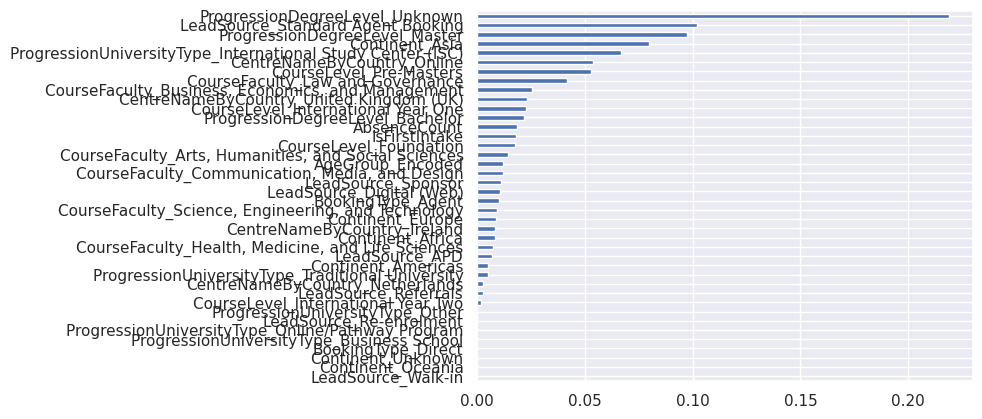

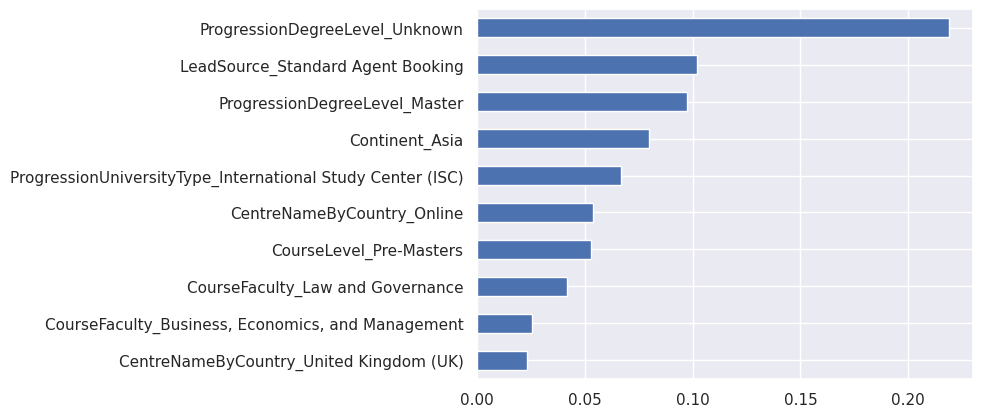

In [ ]:
feature_importance = pd.Series(best_model_xgb2.feature_importances_, index=X_train2.columns).sort_values()

feature_importance.plot.barh()
plt.show()

feature_importance.iloc[-10:].plot.barh()
plt.show()

In [ ]:
import shap
shap.initjs()

shap_ex = shap.TreeExplainer(best_model_xgb2)
vals = shap_ex(X_test2)

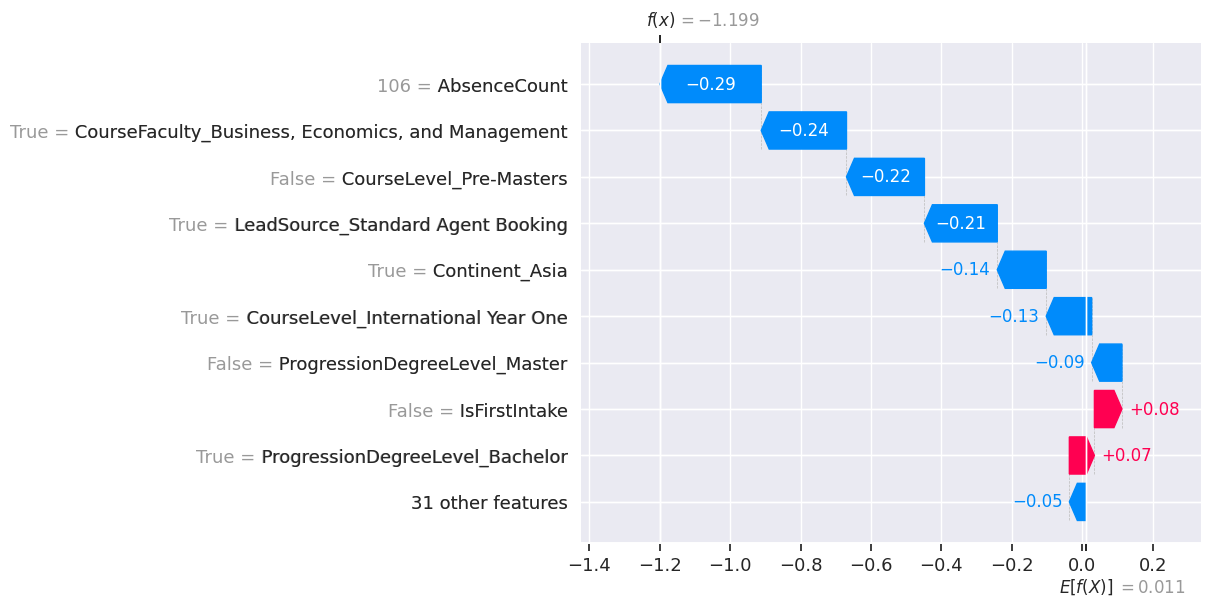

In [ ]:
# Waterfall plot
shap.plots.waterfall(vals[14])

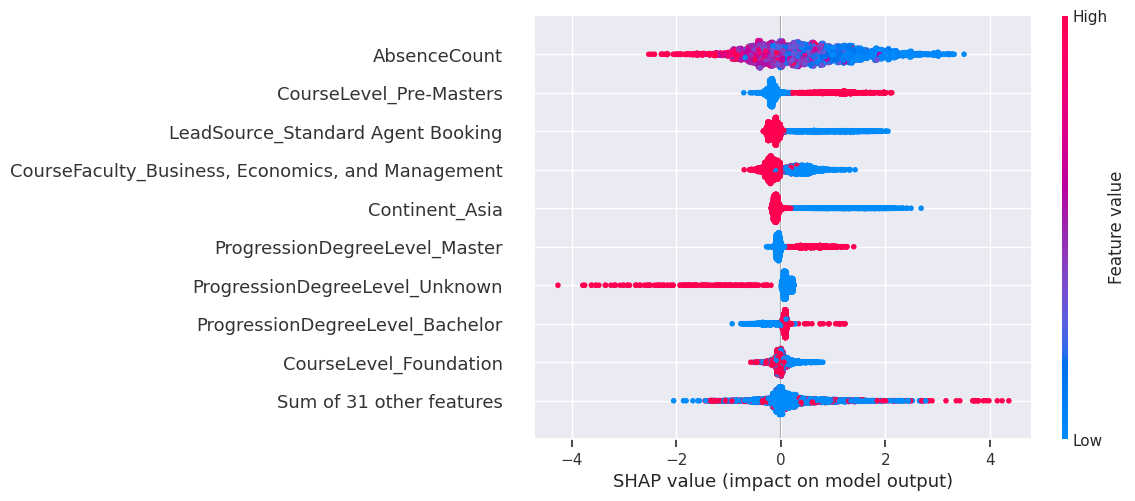

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(vals)

**Neural Network**

In [ ]:
# One-hot encode the 'Category' column
X2_encoded = pd.get_dummies(X2, columns=['AgeGroup_Encoded'])

print(X2_encoded)

       IsFirstIntake  AbsenceCount  BookingType_Agent  BookingType_Direct  \
1              False          98.0               True               False   
2              False          98.0               True               False   
3               True          82.0               True               False   
5               True          70.0               True               False   
6              False          47.0               True               False   
...              ...           ...                ...                 ...   
25054          False           5.0               True               False   
25055          False           0.0               True               False   
25056          False           2.0               True               False   
25057          False          74.0               True               False   
25058          False           1.0               True               False   

       LeadSource_APD  LeadSource_Digital (Web)  LeadSource_Re-enrolment  \

In [ ]:
# Split the data into training and testing sets.
X_traind2, X_testd2, y_traind2, y_testd2 = train_test_split(X2_encoded, target2,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=target2)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),  # Convert list to NumPy array
    y=y_traind2
)

# Convert class weights to a dictionary
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Class Weights: {class_weight_dict}")

Class Weights: {0: 3.4430204364392103, 1: 0.5849467427764373}


In [ ]:
# Function to create a classification model.
def create_model2(learning_rate=0.001, activation='relu'):
    inputs = Input(shape=(X_traind2.shape[1],))
    x = Dense(64, activation=activation)(inputs)
    x = Dense(32, activation=activation)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', Precision(), Recall(), AUC(name='auc')])

    return model

In [ ]:
# Train the model
modelNN2 = create_model2(learning_rate=0.001, activation='relu')

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


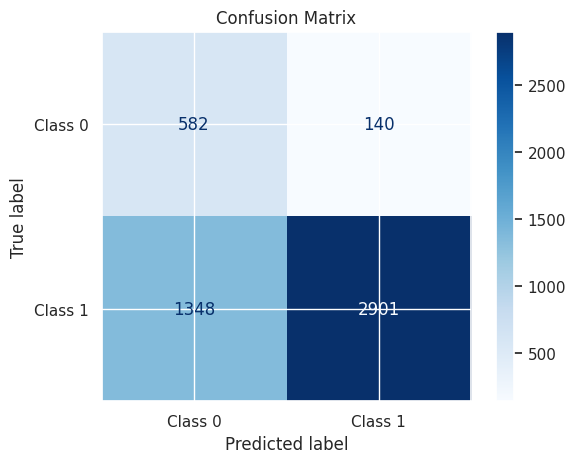

{'accuracy': 0.7006638503319251,
 'precision': 0.9539625123314699,
 'recall': 0.6827488820899035,
 'auc': 0.81757283,
 'history': <keras.src.callbacks.history.History at 0x7b8432139790>,
 'confusion_matrix': array([[ 582,  140],
        [1348, 2901]])}

In [ ]:
train_evaluate_model(modelNN2, X_traind2, y_traind2,
                         X_testd2, y_testd2, epochs=10,
                         batch_size=32 )

In [ ]:
history2 = modelNN2.fit(X_traind2, y_traind2, epochs=10, batch_size=32, validation_data=(X_testd2, y_testd2), verbose=0, class_weight=class_weight_dict)

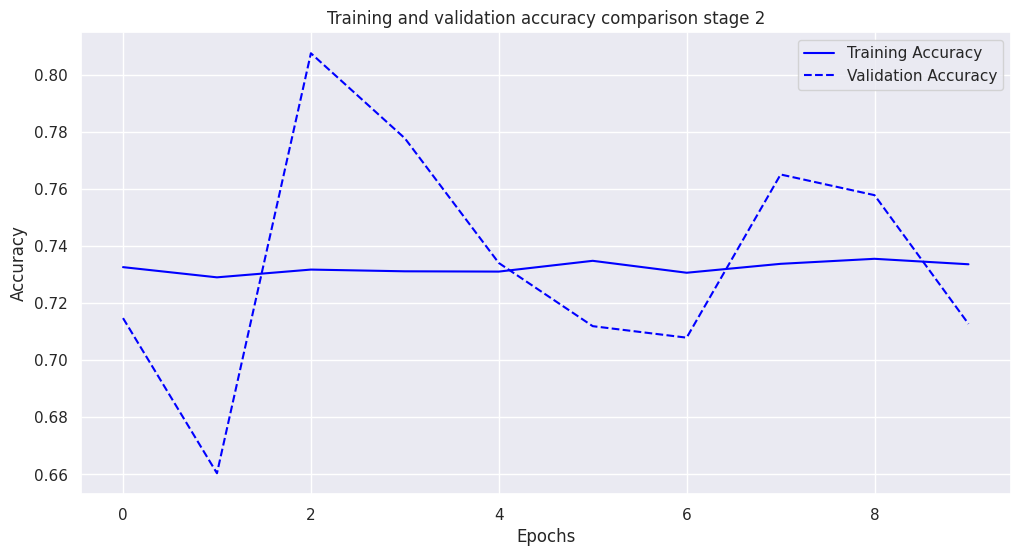

In [ ]:
# Plot accuracy.
plt.figure(figsize=(12, 6))
plt.plot(history2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='--')
plt.title('Training and validation accuracy comparison stage 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Tuned Neural Network**

In [ ]:
# Hyperparameter tuning.
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
activations = ['relu', 'tanh', 'sigmoid']

results = []

# Create a for loop for each vector.
for lr in learning_rates:
    for bs in batch_sizes:
        for activation in activations:
            model2 = create_model2(learning_rate=lr,
                                 activation=activation)
            accuracy, history = train_evaluate_modelT(model2, X_traind2,
                                                     y_traind2, X_testd2,
                                                     y_testd2, batch_size=bs)
            results.append({'learning_rate': lr,
                            'batch_size': bs,
                            'activation': activation,
                            'accuracy': accuracy})

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/15

In [ ]:
# Display the results.
results_df = pd.DataFrame(results)

# Pivot the table for better visibility.
pivoted_df = results_df.pivot_table(index=['learning_rate',
                                           'batch_size'],
                                    columns='activation',
                                    values='accuracy')

# View the DataFrame.
pivoted_df

activation                    relu   sigmoid      tanh
learning_rate batch_size                              
0.001         32          0.859787  0.867230  0.864414
              64          0.861396  0.864816  0.869242
              128         0.869040  0.864414  0.869443
0.010         32          0.857373  0.856568  0.864414
              64          0.860390  0.863207  0.862201
              128         0.865419  0.864615  0.861195
0.100         32          0.854758  0.854758  0.854758
              64          0.856970  0.854758  0.854758
              128         0.854758  0.860994  0.854758

In [ ]:
# Train the model
modelNNT2 = create_model2(learning_rate=0.010, activation='relu')

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


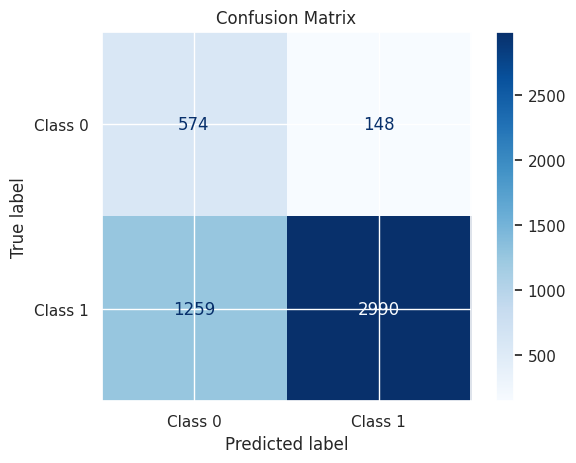

{'accuracy': 0.7169583584791792,
 'precision': 0.952836201402167,
 'recall': 0.7036949870557778,
 'auc': 0.81165767,
 'history': <keras.src.callbacks.history.History at 0x7b842e0b7590>,
 'confusion_matrix': array([[ 574,  148],
        [1259, 2990]])}

In [ ]:
train_evaluate_model(modelNNT2, X_traind2, y_traind2,
                         X_testd2, y_testd2, epochs=50,
                         batch_size=128)

In [ ]:
historyT2 = modelNNT2.fit(X_traind2, y_traind2, epochs=50, batch_size=32, validation_data=(X_testd2, y_testd2), verbose=0, class_weight=class_weight_dict)

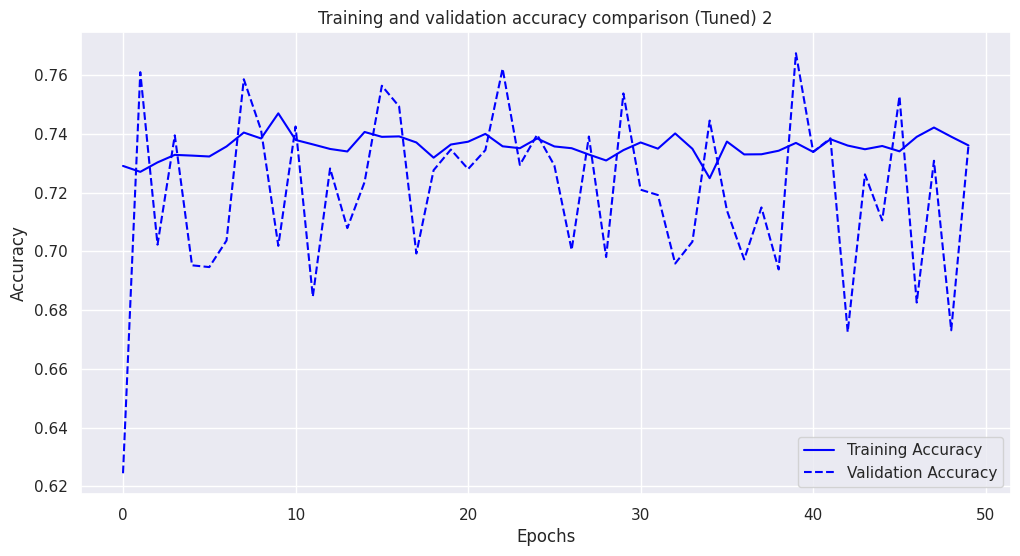

In [ ]:
# Plot accuracy.
plt.figure(figsize=(12, 6))
plt.plot(historyT2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(historyT2.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='--')
plt.title('Training and validation accuracy comparison (Tuned) 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Stage 3 data

In [ ]:
# File URL
file_url = "https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"

**Stage 3: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with rows that have missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.






In [ ]:
# File ID from Google Drive link
file_id3 = "18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"
url3 = f"https://drive.google.com/uc?id={file_id3}"

# Download the file
gdown.download(url3, "stage3.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-
To: /content/stage3.csv
100%|██████████| 6.37M/6.37M [00:00<00:00, 45.7MB/s]


'stage3.csv'

In [ ]:
# loading the dataset
stage3_df = pd.read_csv("stage3.csv")
print(stage3_df.shape)
stage3_df.head()

(25059, 21)


CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity  ...  \
0                 Nanjing  ...   
1                   Xi'an  ...   
2                 Chengdu  ...   
3  LIUYANG CITY ;CHANGSHA  ...   
4                  Xiamen  ...   

                                          CourseName IsFirstIntake  \
0                       Business and Law Pre-Masters          True   
1   Life Sciences Undergraduate Foundation Programme         False   
2  Business Management and Finance International ...         False   
3  Business Management and Finance International ...          True   
4                       Business and Law Pre-Masters          True   

   CompletedCourse AssessedModules  PassedModules  FailedModules  \
0              Yes             4.0            4.0            0.0   
1              Yes             7.0            7.0            0.0   
2              Yes             8.0            8.0            0.0   
3              Yes             8.0            8.0            0.0   
4              Yes             4.0            4.0            0.0   

                               ProgressionDegree   ProgressionUniversity  \
0  Msc Econ Accounting and Investment Management  University of Aberdeen   
1                        BSc Biological Sciences  University of Aberdeen   
2                                     MA Finance  University of Aberdeen   
3                         MA Business Management  University of Aberdeen   
4          MSc International Business Management  University of Aberdeen   

  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  
0                    NaN                       NaN  
1                   93.0                       5.0  
2                   92.0                       6.0  
3                   67.0                      15.0  
4                    NaN                       NaN  

[5 rows x 21 columns]

In [ ]:
# Data description and exploration
stage3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   LearnerCode               25059 non-null  int64  
 2   BookingType               25059 non-null  object 
 3   LeadSource                25059 non-null  object 
 4   DiscountType              7595 non-null   object 
 5   DateofBirth               25059 non-null  object 
 6   Gender                    25059 non-null  object 
 7   Nationality               25059 non-null  object 
 8   HomeState                 8925 non-null   object 
 9   HomeCity                  21611 non-null  object 
 10  CourseLevel               25059 non-null  object 
 11  CourseName                25059 non-null  object 
 12  IsFirstIntake             25059 non-null  bool   
 13  CompletedCourse           25059 non-null  object 
 14  Assess

**Data Cleaning**

In [ ]:
# Split the column by the first space
stage3_df[['ProgressionDegreeLevel', 'Other']] = stage3_df['ProgressionDegree'].str.split(' ', n=1, expand=True)

In [ ]:
stage3_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity  ... CompletedCourse AssessedModules  PassedModules  \
0                 Nanjing  ...             Yes             4.0            4.0   
1                   Xi'an  ...             Yes             7.0            7.0   
2                 Chengdu  ...             Yes             8.0            8.0   
3  LIUYANG CITY ;CHANGSHA  ...             Yes             8.0            8.0   
4                  Xiamen  ...             Yes             4.0            4.0   

  FailedModules                              ProgressionDegree  \
0           0.0  Msc Econ Accounting and Investment Management   
1           0.0                        BSc Biological Sciences   
2           0.0                                     MA Finance   
3           0.0                         MA Business Management   
4           0.0          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount UnauthorisedAbsenceCount  \
0  University of Aberdeen                     NaN                      NaN   
1  University of Aberdeen                    93.0                      5.0   
2  University of Aberdeen                    92.0                      6.0   
3  University of Aberdeen                    67.0                     15.0   
4  University of Aberdeen                     NaN                      NaN   

  ProgressionDegreeLevel                                      Other  
0                    Msc  Econ Accounting and Investment Management  
1                    BSc                        Biological Sciences  
2                     MA                                    Finance  
3                     MA                        Business Management  
4                    MSc          International Business Management  

[5 rows x 23 columns]

In [ ]:
# Grouping of variables
# Use map() for replacement
stage3_df['ProgressionDegreeLevel'] = stage3_df['ProgressionDegreeLevel'].map(mapping1).fillna(stage3_df['ProgressionDegreeLevel'])

# Display the updated DataFrame
stage3_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity  ... CompletedCourse AssessedModules  PassedModules  \
0                 Nanjing  ...             Yes             4.0            4.0   
1                   Xi'an  ...             Yes             7.0            7.0   
2                 Chengdu  ...             Yes             8.0            8.0   
3  LIUYANG CITY ;CHANGSHA  ...             Yes             8.0            8.0   
4                  Xiamen  ...             Yes             4.0            4.0   

  FailedModules                              ProgressionDegree  \
0           0.0  Msc Econ Accounting and Investment Management   
1           0.0                        BSc Biological Sciences   
2           0.0                                     MA Finance   
3           0.0                         MA Business Management   
4           0.0          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount UnauthorisedAbsenceCount  \
0  University of Aberdeen                     NaN                      NaN   
1  University of Aberdeen                    93.0                      5.0   
2  University of Aberdeen                    92.0                      6.0   
3  University of Aberdeen                    67.0                     15.0   
4  University of Aberdeen                     NaN                      NaN   

  ProgressionDegreeLevel                                      Other  
0                 Master  Econ Accounting and Investment Management  
1               Bachelor                        Biological Sciences  
2                 Master                                    Finance  
3                 Master                        Business Management  
4                    MSc          International Business Management  

[5 rows x 23 columns]

In [ ]:
# Get unique values
unique_degrees = stage3_df['ProgressionDegreeLevel'].unique()
print(unique_degrees)

['Master' 'Bachelor' 'MSc' 'MSC' nan 'BSC' 'Bsc' 'Beng' 'Bcomm' 'BENG'
 'BEng/MEng' 'BSc(Hons)' 'Mpharm' 'BSc/Msci' 'LAW' 'media' 'Meng;' 'Meng'
 'MScÂ\xa0' 'Ma' 'MPlan' 'management' 'BENg']


In [ ]:
# Use map() for replacement
stage3_df['ProgressionDegreeLevel'] = stage3_df['ProgressionDegreeLevel'].map(mapping2).fillna(stage3_df['ProgressionDegreeLevel'])
stage3_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity  ... CompletedCourse AssessedModules  PassedModules  \
0                 Nanjing  ...             Yes             4.0            4.0   
1                   Xi'an  ...             Yes             7.0            7.0   
2                 Chengdu  ...             Yes             8.0            8.0   
3  LIUYANG CITY ;CHANGSHA  ...             Yes             8.0            8.0   
4                  Xiamen  ...             Yes             4.0            4.0   

  FailedModules                              ProgressionDegree  \
0           0.0  Msc Econ Accounting and Investment Management   
1           0.0                        BSc Biological Sciences   
2           0.0                                     MA Finance   
3           0.0                         MA Business Management   
4           0.0          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount UnauthorisedAbsenceCount  \
0  University of Aberdeen                     NaN                      NaN   
1  University of Aberdeen                    93.0                      5.0   
2  University of Aberdeen                    92.0                      6.0   
3  University of Aberdeen                    67.0                     15.0   
4  University of Aberdeen                     NaN                      NaN   

  ProgressionDegreeLevel                                      Other  
0                 Master  Econ Accounting and Investment Management  
1               Bachelor                        Biological Sciences  
2                 Master                                    Finance  
3                 Master                        Business Management  
4                 Master          International Business Management  

[5 rows x 23 columns]

In [ ]:
# Get unique values
unique_degrees = stage3_df['ProgressionDegreeLevel'].unique()
print(unique_degrees)

['Master' 'Bachelor' nan]


In [ ]:
# Replace NaN with None
stage3_df['ProgressionDegreeLevel'] = stage3_df['ProgressionDegreeLevel'].replace(
    {np.nan: 'Unknown'}
)

stage3_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity  ... CompletedCourse AssessedModules  PassedModules  \
0                 Nanjing  ...             Yes             4.0            4.0   
1                   Xi'an  ...             Yes             7.0            7.0   
2                 Chengdu  ...             Yes             8.0            8.0   
3  LIUYANG CITY ;CHANGSHA  ...             Yes             8.0            8.0   
4                  Xiamen  ...             Yes             4.0            4.0   

  FailedModules                              ProgressionDegree  \
0           0.0  Msc Econ Accounting and Investment Management   
1           0.0                        BSc Biological Sciences   
2           0.0                                     MA Finance   
3           0.0                         MA Business Management   
4           0.0          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount UnauthorisedAbsenceCount  \
0  University of Aberdeen                     NaN                      NaN   
1  University of Aberdeen                    93.0                      5.0   
2  University of Aberdeen                    92.0                      6.0   
3  University of Aberdeen                    67.0                     15.0   
4  University of Aberdeen                     NaN                      NaN   

  ProgressionDegreeLevel                                      Other  
0                 Master  Econ Accounting and Investment Management  
1               Bachelor                        Biological Sciences  
2                 Master                                    Finance  
3                 Master                        Business Management  
4                 Master          International Business Management  

[5 rows x 23 columns]

In [ ]:
# Get unique values
unique_degrees = stage3_df['ProgressionDegreeLevel'].unique()
print(unique_degrees)

['Master' 'Bachelor' 'Unknown']


In [ ]:
# Grouping of variables
# Use map() for replacement
stage3_df['CourseFaculty'] = stage2_df['CourseName'].map(mapping3).fillna(stage3_df['CourseName'])
stage3_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity  ... AssessedModules PassedModules  FailedModules  \
0                 Nanjing  ...             4.0           4.0            0.0   
1                   Xi'an  ...             7.0           7.0            0.0   
2                 Chengdu  ...             8.0           8.0            0.0   
3  LIUYANG CITY ;CHANGSHA  ...             8.0           8.0            0.0   
4                  Xiamen  ...             4.0           4.0            0.0   

                               ProgressionDegree   ProgressionUniversity  \
0  Msc Econ Accounting and Investment Management  University of Aberdeen   
1                        BSc Biological Sciences  University of Aberdeen   
2                                     MA Finance  University of Aberdeen   
3                         MA Business Management  University of Aberdeen   
4          MSc International Business Management  University of Aberdeen   

   AuthorisedAbsenceCount  UnauthorisedAbsenceCount ProgressionDegreeLevel  \
0                     NaN                       NaN                 Master   
1                    93.0                       5.0               Bachelor   
2                    92.0                       6.0                 Master   
3                    67.0                      15.0                 Master   
4                     NaN                       NaN                 Master   

                                       Other  \
0  Econ Accounting and Investment Management   
1                        Biological Sciences   
2                                    Finance   
3                        Business Management   
4          International Business Management   

                         CourseFaculty  
0                                  NaN  
1  Health, Medicine, and Life Sciences  
2  Business, Economics, and Management  
3  Business, Economics, and Management  
4                                  NaN  

[5 rows x 24 columns]

In [ ]:
# Convert 'DateOfBirth' column to datetime
stage3_df['DateofBirth'] = pd.to_datetime(stage3_df['DateofBirth'])


# Apply the function to the 'DateOfBirth' column
stage3_df['Age'] = stage3_df['DateofBirth'].apply(calculate_age)

stage3_df.head()

<ipython-input-115-19759db01a7f>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  stage3_df['DateofBirth'] = pd.to_datetime(stage3_df['DateofBirth'])


CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  1998-01-13   Male     Chinese  Jianye District; Jiangsu Province   
1  1998-02-12   Male     Chinese                                NaN   
2  2000-04-07   Male     Chinese                                NaN   
3  1999-05-18   Male     Chinese                                NaN   
4  1996-04-19   Male     Chinese                                NaN   

                 HomeCity  ... PassedModules FailedModules  \
0                 Nanjing  ...           4.0           0.0   
1                   Xi'an  ...           7.0           0.0   
2                 Chengdu  ...           8.0           0.0   
3  LIUYANG CITY ;CHANGSHA  ...           8.0           0.0   
4                  Xiamen  ...           4.0           0.0   

                               ProgressionDegree   ProgressionUniversity  \
0  Msc Econ Accounting and Investment Management  University of Aberdeen   
1                        BSc Biological Sciences  University of Aberdeen   
2                                     MA Finance  University of Aberdeen   
3                         MA Business Management  University of Aberdeen   
4          MSc International Business Management  University of Aberdeen   

   AuthorisedAbsenceCount  UnauthorisedAbsenceCount  ProgressionDegreeLevel  \
0                     NaN                       NaN                  Master   
1                    93.0                       5.0                Bachelor   
2                    92.0                       6.0                  Master   
3                    67.0                      15.0                  Master   
4                     NaN                       NaN                  Master   

                                       Other  \
0  Econ Accounting and Investment Management   
1                        Biological Sciences   
2                                    Finance   
3                        Business Management   
4          International Business Management   

                         CourseFaculty  Age  
0                                  NaN   27  
1  Health, Medicine, and Life Sciences   27  
2  Business, Economics, and Management   24  
3  Business, Economics, and Management   25  
4                                  NaN   28  

[5 rows x 25 columns]

In [ ]:
unique_age = stage3_df['Age'].unique()
print(unique_age)

[27 24 25 28 22 23 26 43 29 30 33 31 21 44 39 32 35 20 40 36 34 19 53 50
 47 38 41 45 42 51 48 37 46 49 55 62 57 54]


In [ ]:
# Group the 'Age' column into bins
stage3_df['AgeGroup'] = pd.cut(stage3_df['Age'], bins=bins, labels=labels, right=False)

stage3_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  1998-01-13   Male     Chinese  Jianye District; Jiangsu Province   
1  1998-02-12   Male     Chinese                                NaN   
2  2000-04-07   Male     Chinese                                NaN   
3  1999-05-18   Male     Chinese                                NaN   
4  1996-04-19   Male     Chinese                                NaN   

                 HomeCity  ... FailedModules  \
0                 Nanjing  ...           0.0   
1                   Xi'an  ...           0.0   
2                 Chengdu  ...           0.0   
3  LIUYANG CITY ;CHANGSHA  ...           0.0   
4                  Xiamen  ...           0.0   

                               ProgressionDegree   ProgressionUniversity  \
0  Msc Econ Accounting and Investment Management  University of Aberdeen   
1                        BSc Biological Sciences  University of Aberdeen   
2                                     MA Finance  University of Aberdeen   
3                         MA Business Management  University of Aberdeen   
4          MSc International Business Management  University of Aberdeen   

  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  ProgressionDegreeLevel  \
0                    NaN                       NaN                  Master   
1                   93.0                       5.0                Bachelor   
2                   92.0                       6.0                  Master   
3                   67.0                      15.0                  Master   
4                    NaN                       NaN                  Master   

                                       Other  \
0  Econ Accounting and Investment Management   
1                        Biological Sciences   
2                                    Finance   
3                        Business Management   
4          International Business Management   

                         CourseFaculty Age  AgeGroup  
0                                  NaN  27     19-28  
1  Health, Medicine, and Life Sciences  27     19-28  
2  Business, Economics, and Management  24     19-28  
3  Business, Economics, and Management  25     19-28  
4                                  NaN  28     19-28  

[5 rows x 26 columns]

In [ ]:
# Map nationalities to continents and replacing null
stage3_df['Continent'] = stage3_df['Nationality'].map(nationality_to_continent)

stage3_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  1998-01-13   Male     Chinese  Jianye District; Jiangsu Province   
1  1998-02-12   Male     Chinese                                NaN   
2  2000-04-07   Male     Chinese                                NaN   
3  1999-05-18   Male     Chinese                                NaN   
4  1996-04-19   Male     Chinese                                NaN   

                 HomeCity  ...                              ProgressionDegree  \
0                 Nanjing  ...  Msc Econ Accounting and Investment Management   
1                   Xi'an  ...                        BSc Biological Sciences   
2                 Chengdu  ...                                     MA Finance   
3  LIUYANG CITY ;CHANGSHA  ...                         MA Business Management   
4                  Xiamen  ...          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount UnauthorisedAbsenceCount  \
0  University of Aberdeen                     NaN                      NaN   
1  University of Aberdeen                    93.0                      5.0   
2  University of Aberdeen                    92.0                      6.0   
3  University of Aberdeen                    67.0                     15.0   
4  University of Aberdeen                     NaN                      NaN   

   ProgressionDegreeLevel                                      Other  \
0                  Master  Econ Accounting and Investment Management   
1                Bachelor                        Biological Sciences   
2                  Master                                    Finance   
3                  Master                        Business Management   
4                  Master          International Business Management   

                         CourseFaculty Age AgeGroup  Continent  
0                                  NaN  27    19-28       Asia  
1  Health, Medicine, and Life Sciences  27    19-28       Asia  
2  Business, Economics, and Management  24    19-28       Asia  
3  Business, Economics, and Management  25    19-28       Asia  
4                                  NaN  28    19-28       Asia  

[5 rows x 27 columns]

In [ ]:
# Get unique values
unique_cont = stage3_df['Continent'].unique()
print(unique_cont)

['Asia' 'Africa' 'Europe' 'Americas' 'Unknown' 'Oceania']


In [ ]:
# Map the institution types to the DataFrame
stage3_df['ProgressionUniversityType'] = stage3_df['ProgressionUniversity'].map(institution_type_dict)
stage3_df.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  1998-01-13   Male     Chinese  Jianye District; Jiangsu Province   
1  1998-02-12   Male     Chinese                                NaN   
2  2000-04-07   Male     Chinese                                NaN   
3  1999-05-18   Male     Chinese                                NaN   
4  1996-04-19   Male     Chinese                                NaN   

                 HomeCity  ...   ProgressionUniversity AuthorisedAbsenceCount  \
0                 Nanjing  ...  University of Aberdeen                    NaN   
1                   Xi'an  ...  University of Aberdeen                   93.0   
2                 Chengdu  ...  University of Aberdeen                   92.0   
3  LIUYANG CITY ;CHANGSHA  ...  University of Aberdeen                   67.0   
4                  Xiamen  ...  University of Aberdeen                    NaN   

   UnauthorisedAbsenceCount ProgressionDegreeLevel  \
0                       NaN                 Master   
1                       5.0               Bachelor   
2                       6.0                 Master   
3                      15.0                 Master   
4                       NaN                 Master   

                                       Other  \
0  Econ Accounting and Investment Management   
1                        Biological Sciences   
2                                    Finance   
3                        Business Management   
4          International Business Management   

                         CourseFaculty  Age AgeGroup Continent  \
0                                  NaN   27    19-28      Asia   
1  Health, Medicine, and Life Sciences   27    19-28      Asia   
2  Business, Economics, and Management   24    19-28      Asia   
3  Business, Economics, and Management   25    19-28      Asia   
4                                  NaN   28    19-28      Asia   

   ProgressionUniversityType  
0     Traditional University  
1     Traditional University  
2     Traditional University  
3     Traditional University  
4     Traditional University  

[5 rows x 28 columns]

In [ ]:
# Map the ISCs to their countries
stage3_df['CentreNameByCountry'] = stage3_df['CentreName'].map(country_grouping_dict)

In [ ]:
columns_to_check = ['UnauthorisedAbsenceCount', 'AuthorisedAbsenceCount']  # Specify the columns here
stage3_df = stage3_df.dropna(subset=columns_to_check)

In [ ]:
# Impute missing values with the group-specific mean
columns_to_impute = ['AssessedModules', 'PassedModules', 'FailedModules']
for col in columns_to_impute:
    means = stage3_df.groupby('CompletedCourse')[col].transform('mean')
    stage3_df[col] = stage3_df[col].fillna(means)

In [ ]:
stage3_df['AbsenceCount'] = stage3_df['UnauthorisedAbsenceCount'] + stage3_df['AuthorisedAbsenceCount']

In [ ]:
stage3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24851 entries, 1 to 25058
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CentreName                 24851 non-null  object        
 1   LearnerCode                24851 non-null  int64         
 2   BookingType                24851 non-null  object        
 3   LeadSource                 24851 non-null  object        
 4   DiscountType               7538 non-null   object        
 5   DateofBirth                24851 non-null  datetime64[ns]
 6   Gender                     24851 non-null  object        
 7   Nationality                24851 non-null  object        
 8   HomeState                  8859 non-null   object        
 9   HomeCity                   21440 non-null  object        
 10  CourseLevel                24851 non-null  object        
 11  CourseName                 24851 non-null  object        
 12  IsFirstIn

In [ ]:
# Get the number of unique values for all columns
unique_counts = stage3_df.nunique()

print(unique_counts)

CentreName                      19
LearnerCode                  24672
BookingType                      2
LeadSource                       7
DiscountType                    11
DateofBirth                   4679
Gender                           2
Nationality                    150
HomeState                     2436
HomeCity                      5860
CourseLevel                      4
CourseName                     172
IsFirstIntake                    2
CompletedCourse                  2
AssessedModules                 13
PassedModules                   13
FailedModules                   12
ProgressionDegree             2600
ProgressionUniversity           39
AuthorisedAbsenceCount         190
UnauthorisedAbsenceCount       258
ProgressionDegreeLevel           3
Other                         2248
CourseFaculty                    6
Age                             38
AgeGroup                         5
Continent                        6
ProgressionUniversityType        5
CentreNameByCountry 

In [ ]:
# LearnerCode, Age, DateofBirth and Other are some of the useless columns in the dataset
# DiscountType and HomeState are columns with more than 50% missing values
# Drop the those columns
stage3_dfclean = stage3_df.drop(['LearnerCode', 'Other', 'Age', 'DateofBirth', 'Nationality', 'CentreName','UnauthorisedAbsenceCount', 'AuthorisedAbsenceCount',
                                 'DiscountType', 'HomeState', 'HomeCity', 'ProgressionDegree','CourseName', 'ProgressionUniversity', 'AssessedModules'], axis=1)

stage3_dfclean.head()

BookingType              LeadSource Gender             CourseLevel  \
1       Agent  Standard Agent Booking   Male              Foundation   
2       Agent  Standard Agent Booking   Male  International Year Two   
3       Agent  Standard Agent Booking   Male  International Year Two   
5       Agent  Standard Agent Booking   Male  International Year Two   
6       Agent  Standard Agent Booking   Male              Foundation   

   IsFirstIntake CompletedCourse  PassedModules  FailedModules  \
1          False             Yes       7.000000       0.000000   
2          False             Yes       8.000000       0.000000   
3           True             Yes       8.000000       0.000000   
5           True             Yes       8.000000       0.000000   
6          False              No       0.447246       2.801593   

  ProgressionDegreeLevel                        CourseFaculty AgeGroup  \
1               Bachelor  Health, Medicine, and Life Sciences    19-28   
2                 Master  Business, Economics, and Management    19-28   
3                 Master  Business, Economics, and Management    19-28   
5                 Master  Business, Economics, and Management    19-28   
6                 Master  Business, Economics, and Management    19-28   

  Continent ProgressionUniversityType  CentreNameByCountry  AbsenceCount  
1      Asia    Traditional University  United Kingdom (UK)          98.0  
2      Asia    Traditional University  United Kingdom (UK)          98.0  
3      Asia    Traditional University  United Kingdom (UK)          82.0  
5      Asia    Traditional University  United Kingdom (UK)          70.0  
6      Asia    Traditional University  United Kingdom (UK)          47.0

In [ ]:
# Get the number of unique values for all columns
unique_counts = stage3_dfclean.nunique()

print(unique_counts)

BookingType                    2
LeadSource                     7
Gender                         2
CourseLevel                    4
IsFirstIntake                  2
CompletedCourse                2
PassedModules                 13
FailedModules                 12
ProgressionDegreeLevel         3
CourseFaculty                  6
AgeGroup                       5
Continent                      6
ProgressionUniversityType      5
CentreNameByCountry            4
AbsenceCount                 310
dtype: int64


In [ ]:
# Ordinal encoding for Age Group
age_group_mapping = {
'19-28': 0, '29-38': 1, '39-48': 2, '49-58': 3, '59-68' :4
}
stage3_dfclean['AgeGroup_Encoded'] = stage3_dfclean['AgeGroup'].map(age_group_mapping)

In [ ]:
# Label encoding for CompletedCourse
stage3_dfclean['CompletedCourse_Encoded'] = stage3_dfclean['CompletedCourse'].map({'Yes': 1, 'No': 0})

In [ ]:
# Perform one-hot encoding
stage3_dfclean = pd.get_dummies(stage3_dfclean, columns=[
    'BookingType', 'LeadSource', 'CourseLevel', 'ProgressionDegreeLevel',
    'CourseFaculty', 'Continent', 'ProgressionUniversityType', 'CentreNameByCountry'
])

# Display the encoded DataFrame
stage3_dfclean.head()

Gender  IsFirstIntake CompletedCourse  PassedModules  FailedModules  \
1   Male          False             Yes       7.000000       0.000000   
2   Male          False             Yes       8.000000       0.000000   
3   Male           True             Yes       8.000000       0.000000   
5   Male           True             Yes       8.000000       0.000000   
6   Male          False              No       0.447246       2.801593   

  AgeGroup  AbsenceCount AgeGroup_Encoded  CompletedCourse_Encoded  \
1    19-28          98.0                0                        1   
2    19-28          98.0                0                        1   
3    19-28          82.0                0                        1   
5    19-28          70.0                0                        1   
6    19-28          47.0                0                        0   

   BookingType_Agent  ...  Continent_Unknown  \
1               True  ...              False   
2               True  ...              False   
3               True  ...              False   
5               True  ...              False   
6               True  ...              False   

   ProgressionUniversityType_Business School  \
1                                      False   
2                                      False   
3                                      False   
5                                      False   
6                                      False   

   ProgressionUniversityType_International Study Center (ISC)  \
1                                              False            
2                                              False            
3                                              False            
5                                              False            
6                                              False            

   ProgressionUniversityType_Online/Pathway Program  \
1                                             False   
2                                             False   
3                                             False   
5                                             False   
6                                             False   

   ProgressionUniversityType_Other  \
1                            False   
2                            False   
3                            False   
5                            False   
6                            False   

   ProgressionUniversityType_Traditional University  \
1                                              True   
2                                              True   
3                                              True   
5                                              True   
6                                              True   

   CentreNameByCountry_Ireland  CentreNameByCountry_Netherlands  \
1                        False                            False   
2                        False                            False   
3                        False                            False   
5                        False                            False   
6                        False                            False   

   CentreNameByCountry_Online  CentreNameByCountry_United Kingdom (UK)  
1                       False                                     True  
2                       False                                     True  
3                       False                                     True  
5                       False                                     True  
6                       False                                     True  

[5 rows x 46 columns]

In [ ]:
encoded_stage3_df = stage3_dfclean.drop(['AgeGroup', 'CompletedCourse', 'Gender'], axis=1)

print(encoded_stage3_df.shape)
encoded_stage3_df.head()

(24851, 43)


IsFirstIntake  PassedModules  FailedModules  AbsenceCount AgeGroup_Encoded  \
1          False       7.000000       0.000000          98.0                0   
2          False       8.000000       0.000000          98.0                0   
3           True       8.000000       0.000000          82.0                0   
5           True       8.000000       0.000000          70.0                0   
6          False       0.447246       2.801593          47.0                0   

   CompletedCourse_Encoded  BookingType_Agent  BookingType_Direct  \
1                        1               True               False   
2                        1               True               False   
3                        1               True               False   
5                        1               True               False   
6                        0               True               False   

   LeadSource_APD  LeadSource_Digital (Web)  ...  Continent_Unknown  \
1           False                     False  ...              False   
2           False                     False  ...              False   
3           False                     False  ...              False   
5           False                     False  ...              False   
6           False                     False  ...              False   

   ProgressionUniversityType_Business School  \
1                                      False   
2                                      False   
3                                      False   
5                                      False   
6                                      False   

   ProgressionUniversityType_International Study Center (ISC)  \
1                                              False            
2                                              False            
3                                              False            
5                                              False            
6                                              False            

   ProgressionUniversityType_Online/Pathway Program  \
1                                             False   
2                                             False   
3                                             False   
5                                             False   
6                                             False   

   ProgressionUniversityType_Other  \
1                            False   
2                            False   
3                            False   
5                            False   
6                            False   

   ProgressionUniversityType_Traditional University  \
1                                              True   
2                                              True   
3                                              True   
5                                              True   
6                                              True   

   CentreNameByCountry_Ireland  CentreNameByCountry_Netherlands  \
1                        False                            False   
2                        False                            False   
3                        False                            False   
5                        False                            False   
6                        False                            False   

   CentreNameByCountry_Online  CentreNameByCountry_United Kingdom (UK)  
1                       False                                     True  
2                       False                                     True  
3                       False                                     True  
5                       False                                     True  
6                       False                                     True  

[5 rows x 43 columns]

In [ ]:
encoded_stage3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24851 entries, 1 to 25058
Data columns (total 43 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   IsFirstIntake                                               24851 non-null  bool    
 1   PassedModules                                               24851 non-null  float64 
 2   FailedModules                                               24851 non-null  float64 
 3   AbsenceCount                                                24851 non-null  float64 
 4   AgeGroup_Encoded                                            24851 non-null  category
 5   CompletedCourse_Encoded                                     24851 non-null  int64   
 6   BookingType_Agent                                           24851 non-null  bool    
 7   BookingType_Direct                                          24851 non-null  bool 

**Building Models**

In [ ]:
X3 = encoded_stage3_df.drop('CompletedCourse_Encoded', axis=1)  # Features
X3.head()

IsFirstIntake  PassedModules  FailedModules  AbsenceCount AgeGroup_Encoded  \
1          False       7.000000       0.000000          98.0                0   
2          False       8.000000       0.000000          98.0                0   
3           True       8.000000       0.000000          82.0                0   
5           True       8.000000       0.000000          70.0                0   
6          False       0.447246       2.801593          47.0                0   

   BookingType_Agent  BookingType_Direct  LeadSource_APD  \
1               True               False           False   
2               True               False           False   
3               True               False           False   
5               True               False           False   
6               True               False           False   

   LeadSource_Digital (Web)  LeadSource_Re-enrolment  ...  Continent_Unknown  \
1                     False                    False  ...              False   
2                     False                    False  ...              False   
3                     False                    False  ...              False   
5                     False                    False  ...              False   
6                     False                    False  ...              False   

   ProgressionUniversityType_Business School  \
1                                      False   
2                                      False   
3                                      False   
5                                      False   
6                                      False   

   ProgressionUniversityType_International Study Center (ISC)  \
1                                              False            
2                                              False            
3                                              False            
5                                              False            
6                                              False            

   ProgressionUniversityType_Online/Pathway Program  \
1                                             False   
2                                             False   
3                                             False   
5                                             False   
6                                             False   

   ProgressionUniversityType_Other  \
1                            False   
2                            False   
3                            False   
5                            False   
6                            False   

   ProgressionUniversityType_Traditional University  \
1                                              True   
2                                              True   
3                                              True   
5                                              True   
6                                              True   

   CentreNameByCountry_Ireland  CentreNameByCountry_Netherlands  \
1                        False                            False   
2                        False                            False   
3                        False                            False   
5                        False                            False   
6                        False                            False   

   CentreNameByCountry_Online  CentreNameByCountry_United Kingdom (UK)  
1                       False                                     True  
2                       False                                     True  
3                       False                                     True  
5                       False                                     True  
6                       False                                     True  

[5 rows x 42 columns]

In [ ]:
target3 = encoded_stage3_df['CompletedCourse_Encoded'] # Target Dataset
target3

1        1
2        1
3        1
5        1
6        0
        ..
25054    1
25055    1
25056    1
25057    0
25058    1
Name: CompletedCourse_Encoded, Length: 24851, dtype: int64

<Axes: xlabel='CompletedCourse_Encoded'>

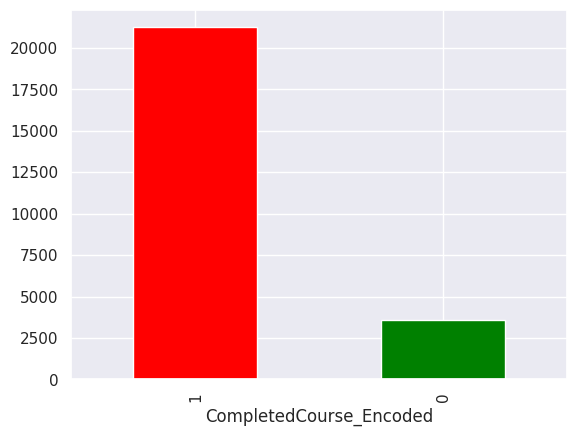

In [ ]:
target3.value_counts().plot.bar(color=['red', 'green']) # Checking for whether the target variable is unbalance or not

In [ ]:
# Split into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, target3, test_size=0.2, random_state=42)

In [ ]:
# Calculate scale_pos_weight to deal with the imbalance classes
negative_samples = (y_train3 == 0).sum()
positive_samples = (y_train3 == 1).sum()
scale_pos_weight = negative_samples / positive_samples

print(f"scale_pos_weight: {scale_pos_weight}")

scale_pos_weight: 0.16954935874808802


In [ ]:
# Train XGBoost model
model3 = XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    objective='binary:logistic',       # For binary classification
    eval_metric='logloss',             # Evaluation metric
    enable_categorical= True,
    random_state=42
)
model3.fit(X_train3, y_train3)

# Evaluate the model
y_pred3 = model3.predict(X_test3)
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       727
           1       0.99      0.98      0.98      4244

    accuracy                           0.97      4971
   macro avg       0.93      0.96      0.95      4971
weighted avg       0.97      0.97      0.97      4971



In [ ]:
# ROC-AUC score
roc_auc_xgb3 = roc_auc_score(y_test3, y_pred3)
print(f"ROC-AUC Score: {roc_auc_xgb3}")

ROC-AUC Score: 0.9628894323825724


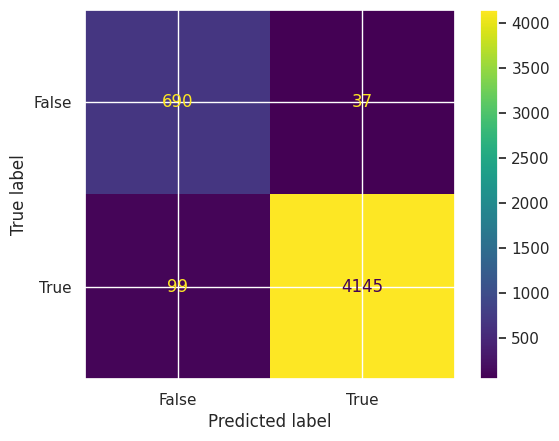

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test3, y_pred3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    model3,
    X3,
    target3,
    # Training sizes to test. Here, from 10% to 100% of the dataset, with 5 steps
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,  # 5-fold cross-validation
    n_jobs=4,  # Use all available cores
    scoring='accuracy'  # Choose appropriate scoring method for your problem
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

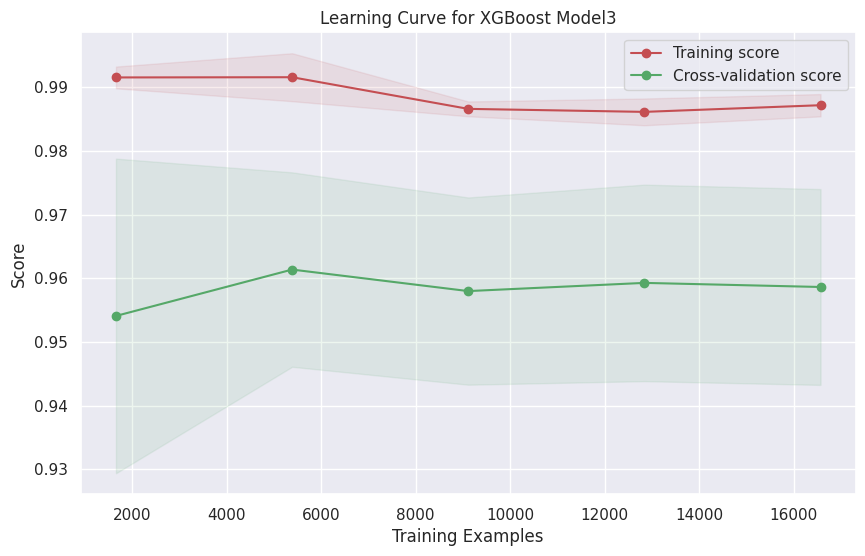

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for XGBoost Model3")
plt.xlabel("Training Examples")
plt.ylabel("Score")

# Plot training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot validation scores
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

**Tuned XGB Model**

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=XGBClassifier(scale_pos_weight=scale_pos_weight, objective='binary:logistic', eval_metric='logloss', enable_categorical=True, random_state=42),
    param_grid=param_grid,
    scoring='f1',  # Use F1-score for imbalanced datasets
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train3, y_train3)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
best_model_xgb3 = grid_search.best_estimator_
y_predt3 = best_model_xgb3.predict(X_test3)
print(classification_report(y_test3, y_predt3))

Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       727
           1       0.99      0.98      0.99      4244

    accuracy                           0.98      4971
   macro avg       0.94      0.96      0.95      4971
weighted avg       0.98      0.98      0.98      4971



In [ ]:
# ROC-AUC score
roc_auc_T3 = roc_auc_score(y_test3, y_predt3)
print(f"ROC-AUC Score for tuned Xgb: {roc_auc_T3}")

ROC-AUC Score for tuned Xgb: 0.9618069105085002


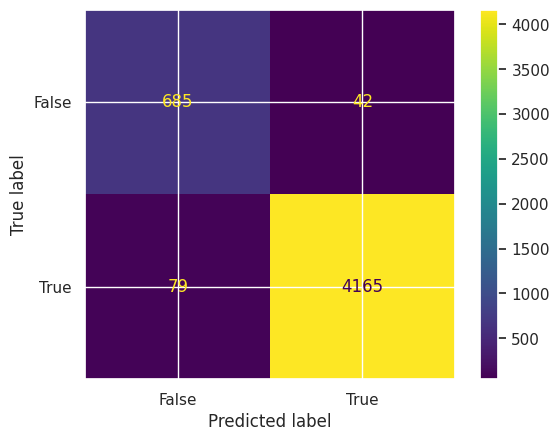

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test3, y_predt3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model_xgb3,
    X3,
    target3,
    # Training sizes to test. Here, from 10% to 100% of the dataset, with 5 steps
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,  # 5-fold cross-validation
    n_jobs=4,  # Use all available cores
    scoring='accuracy'  # Choose appropriate scoring method for your problem
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

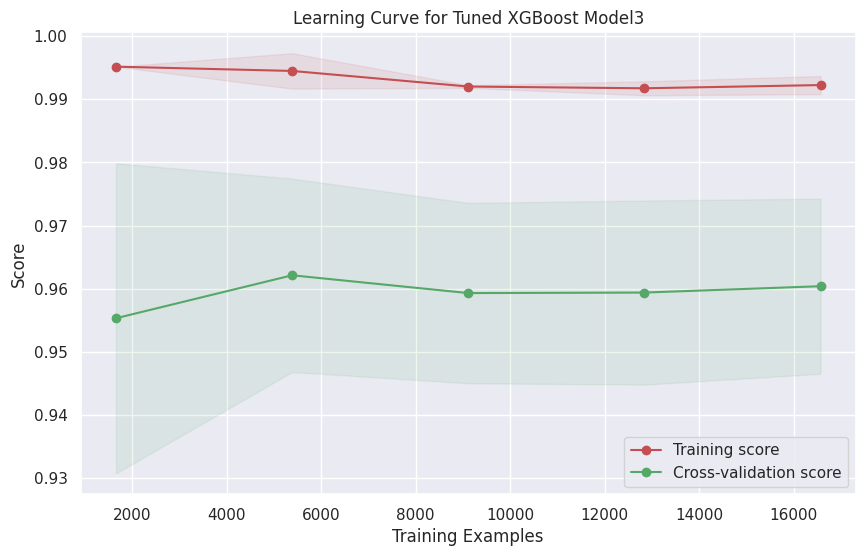

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Tuned XGBoost Model3")
plt.xlabel("Training Examples")
plt.ylabel("Score")

# Plot training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot validation scores
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

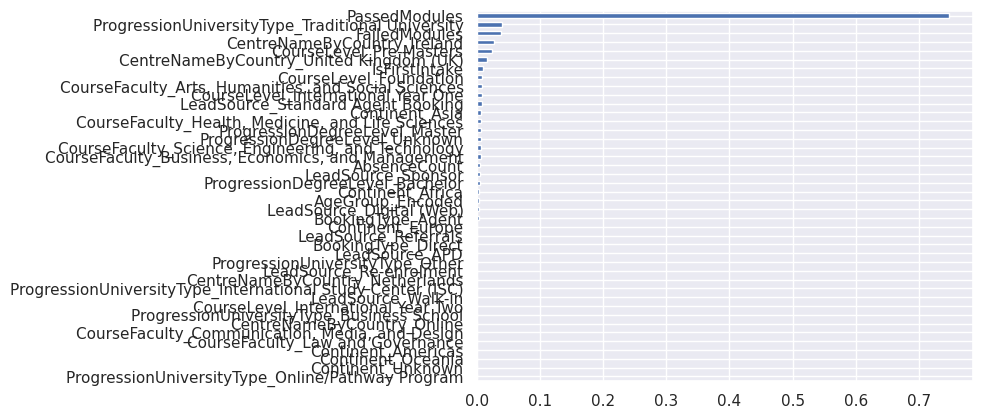

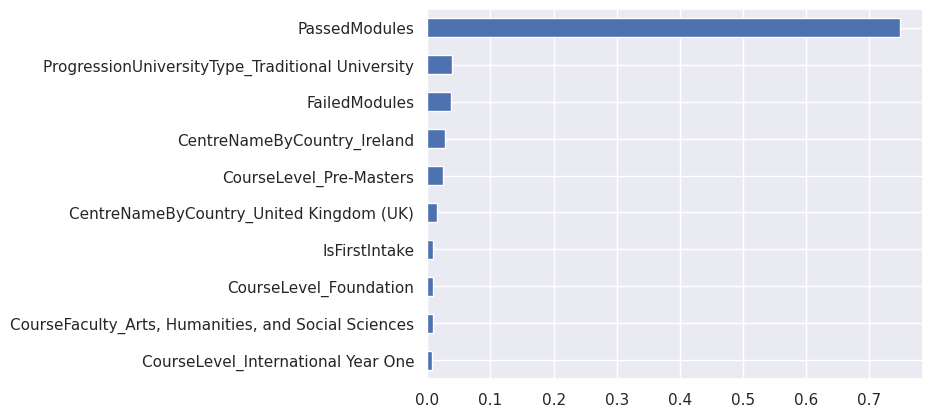

In [ ]:
feature_importance = pd.Series(best_model_xgb3.feature_importances_, index=X_train3.columns).sort_values()

feature_importance.plot.barh()
plt.show()

feature_importance.iloc[-10:].plot.barh()
plt.show()

In [ ]:
shap_ex = shap.TreeExplainer(best_model_xgb3)
vals = shap_ex(X_test3)

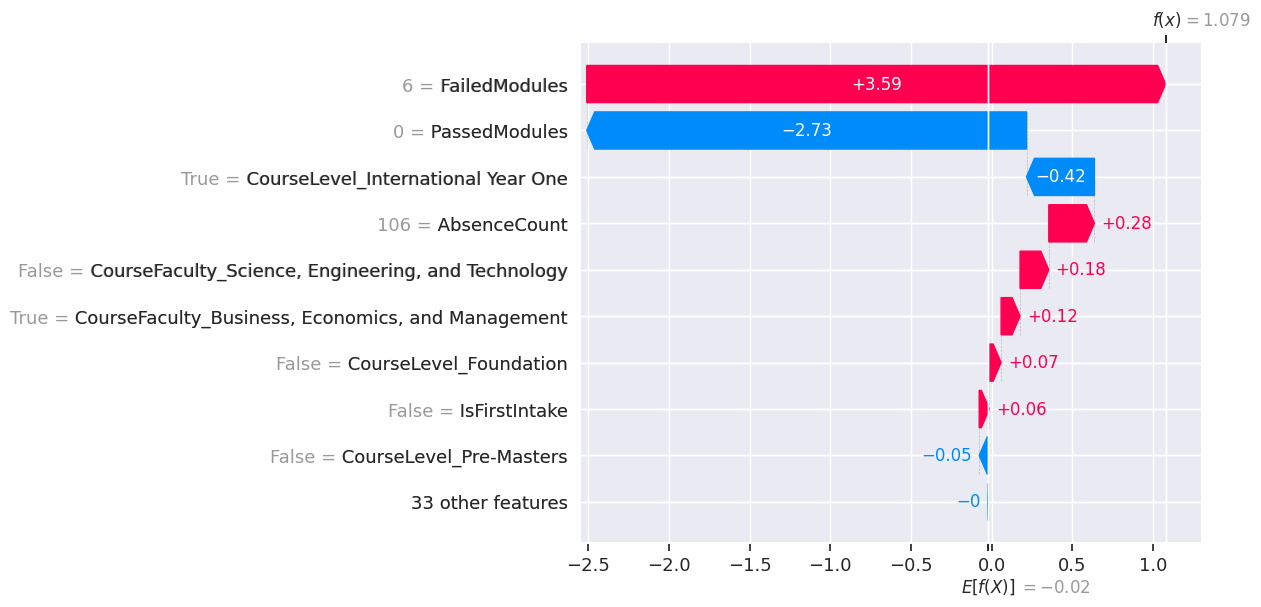

In [ ]:
# Waterfall plot
shap.plots.waterfall(vals[14])

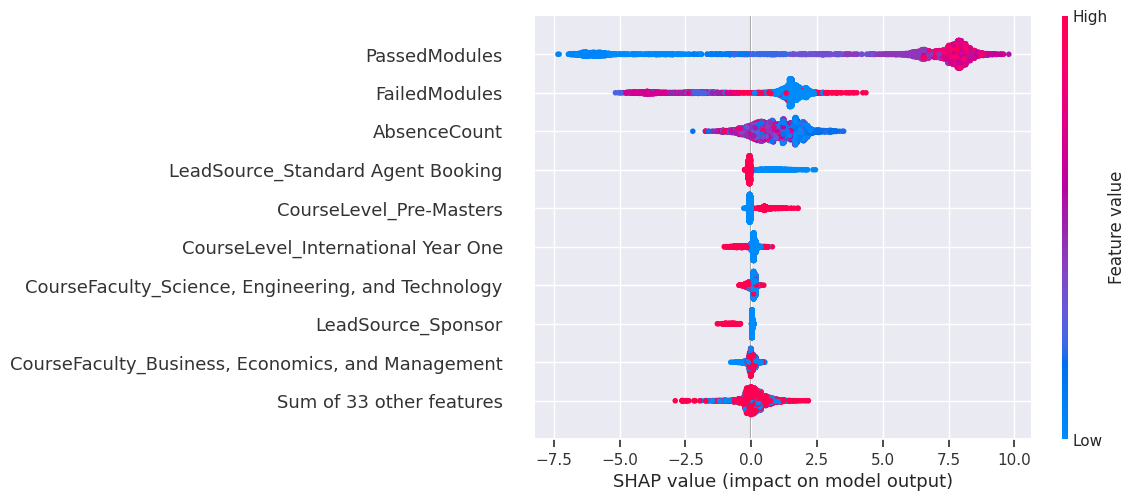

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(vals)

**Neural Network**

In [ ]:
# One-hot encode the 'Category' column
X3_encoded = pd.get_dummies(X3, columns=['AgeGroup_Encoded'])

print(X3_encoded)

       IsFirstIntake  PassedModules  FailedModules  AbsenceCount  \
1              False       7.000000       0.000000          98.0   
2              False       8.000000       0.000000          98.0   
3               True       8.000000       0.000000          82.0   
5               True       8.000000       0.000000          70.0   
6              False       0.447246       2.801593          47.0   
...              ...            ...            ...           ...   
25054          False       3.000000       0.000000           5.0   
25055          False       3.000000       0.000000           0.0   
25056          False       3.000000       0.000000           2.0   
25057          False       0.447246       2.801593          74.0   
25058          False       3.000000       0.000000           1.0   

       BookingType_Agent  BookingType_Direct  LeadSource_APD  \
1                   True               False           False   
2                   True               False           

In [ ]:
# Split the data into training and testing sets.
X_traind3, X_testd3, y_traind3, y_testd3 = train_test_split(X3_encoded, target3,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=target3)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),  # Convert list to NumPy array
    y=y_traind3
)

# Convert class weights to a dictionary
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Class Weights: {class_weight_dict}")

Class Weights: {0: 3.4430204364392103, 1: 0.5849467427764373}


In [ ]:
# Function to create a classification model.
def create_model3(learning_rate=0.001, activation='relu'):
    inputs = Input(shape=(X_traind3.shape[1],))
    x = Dense(64, activation=activation)(inputs)
    x = Dense(32, activation=activation)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', Precision(), Recall(), AUC(name='auc')])

    return model

In [ ]:
# Train the model
modelNN3 = create_model3(learning_rate=0.001, activation='relu')

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


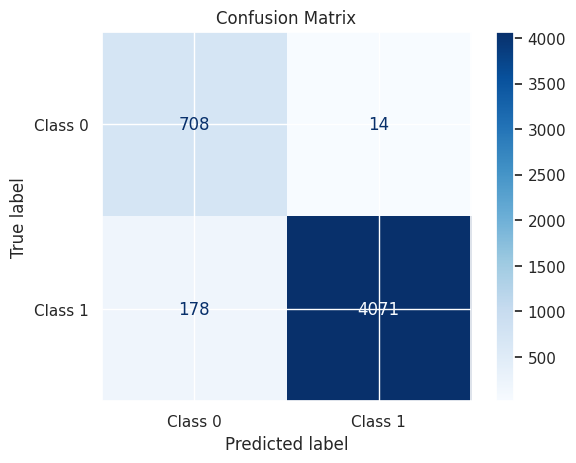

{'accuracy': 0.9613759806879904,
 'precision': 0.9965728274173806,
 'recall': 0.9581077900682513,
 'auc': 0.9962858,
 'history': <keras.src.callbacks.history.History at 0x7b84369fdd10>,
 'confusion_matrix': array([[ 708,   14],
        [ 178, 4071]])}

In [ ]:
train_evaluate_model(modelNN3, X_traind3, y_traind3,
                         X_testd3, y_testd3, epochs=10,
                         batch_size=32 )

In [ ]:
history3 = modelNN3.fit(X_traind3, y_traind3, epochs=10, batch_size=32, validation_data=(X_testd3, y_testd3), verbose=0, class_weight=class_weight_dict)

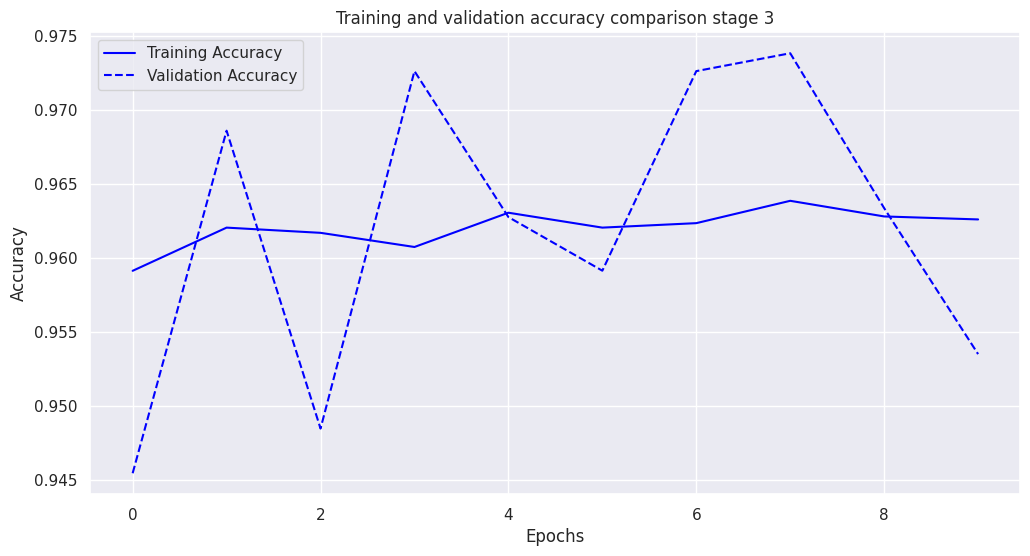

In [ ]:
# Plot accuracy.
plt.figure(figsize=(12, 6))
plt.plot(history3.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='--')
plt.title('Training and validation accuracy comparison stage 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Tuned Neural Network**

In [ ]:
# Hyperparameter tuning.
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
activations = ['relu', 'tanh', 'sigmoid']

results = []

# Create a for loop for each vector.
for lr in learning_rates:
    for bs in batch_sizes:
        for activation in activations:
            model3 = create_model3(learning_rate=lr,
                                 activation=activation)
            accuracy, history = train_evaluate_modelT(model3, X_traind3,
                                                     y_traind3, X_testd3,
                                                     y_testd3, batch_size=bs)
            results.append({'learning_rate': lr,
                            'batch_size': bs,
                            'activation': activation,
                            'accuracy': accuracy})

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━

In [ ]:
# Display the results.
results_df = pd.DataFrame(results)

# Pivot the table for better visibility.
pivoted_df = results_df.pivot_table(index=['learning_rate',
                                           'batch_size'],
                                    columns='activation',
                                    values='accuracy')

# View the DataFrame.
pivoted_df

activation                    relu   sigmoid      tanh
learning_rate batch_size                              
0.001         32          0.968014  0.977469  0.977670
              64          0.968014  0.976262  0.976262
              128         0.977872  0.977469  0.977067
0.010         32          0.973245  0.979481  0.977469
              64          0.974049  0.978073  0.978676
              128         0.974251  0.978877  0.975458
0.100         32          0.854758  0.854758  0.854556
              64          0.946490  0.854758  0.854758
              128         0.977670  0.977067  0.930195

In [ ]:
# Train the model
modelNNT3 = create_model3(learning_rate=0.010, activation='sigmoid')

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


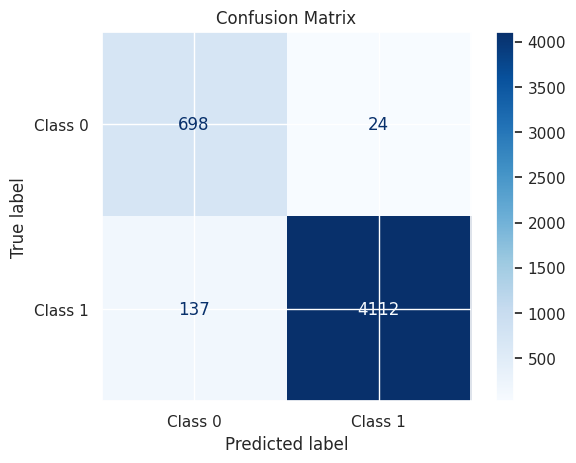

{'accuracy': 0.9676121504727418,
 'precision': 0.9941972920696325,
 'recall': 0.9677571193221934,
 'auc': 0.9924427,
 'history': <keras.src.callbacks.history.History at 0x7b842a84e310>,
 'confusion_matrix': array([[ 698,   24],
        [ 137, 4112]])}

In [ ]:
train_evaluate_model(modelNNT3, X_traind3, y_traind3,
                         X_testd3, y_testd3, epochs=10,
                         batch_size=32)

In [ ]:
historyT3 = modelNNT3.fit(X_traind3, y_traind3, epochs=10, batch_size=32, validation_data=(X_testd3, y_testd3), verbose=0, class_weight=class_weight_dict)

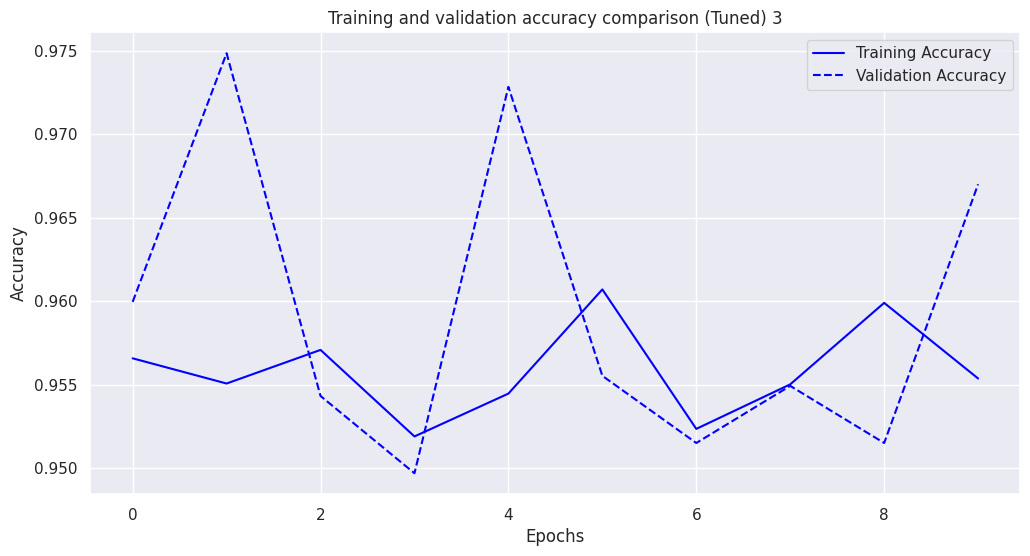

In [ ]:
# Plot accuracy.
plt.figure(figsize=(12, 6))
plt.plot(historyT3.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(historyT3.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='--')
plt.title('Training and validation accuracy comparison (Tuned) 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Declaration
By submitting your project, you indicate that the work is your own and has been created with academic integrity. Refer to the **Cambridge plagiarism regulations**.
